In [2]:
import numpy as np
import os
os.environ["pRT_input_data_path"] = "/Users/s.baratuva.nl/Desktop/PhD/input_data"
from petitRADTRANS import Radtrans


In [2]:
atmosphere = Radtrans(line_species = ['H2O_HITEMP',
                                      #'CO_all_iso_HITEMP',
                                      'CH4'],
                                     # 'CO2',
                                     # 'Na_allard',
                                     # 'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.8])


  Read line opacities of CH4...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.



In [3]:
pressures = np.logspace(-6, 2, 50)
print (pressures)

[1.00000000e-06 1.45634848e-06 2.12095089e-06 3.08884360e-06
 4.49843267e-06 6.55128557e-06 9.54095476e-06 1.38949549e-05
 2.02358965e-05 2.94705170e-05 4.29193426e-05 6.25055193e-05
 9.10298178e-05 1.32571137e-04 1.93069773e-04 2.81176870e-04
 4.09491506e-04 5.96362332e-04 8.68511374e-04 1.26485522e-03
 1.84206997e-03 2.68269580e-03 3.90693994e-03 5.68986603e-03
 8.28642773e-03 1.20679264e-02 1.75751062e-02 2.55954792e-02
 3.72759372e-02 5.42867544e-02 7.90604321e-02 1.15139540e-01
 1.67683294e-01 2.44205309e-01 3.55648031e-01 5.17947468e-01
 7.54312006e-01 1.09854114e+00 1.59985872e+00 2.32995181e+00
 3.39322177e+00 4.94171336e+00 7.19685673e+00 1.04811313e+01
 1.52641797e+01 2.22299648e+01 3.23745754e+01 4.71486636e+01
 6.86648845e+01 1.00000000e+02]


In [4]:
atmosphere.setup_opa_structure(pressures)

In [58]:
temperature = 670. * np.ones_like(pressures)

mass_fractions = {}
mass_fractions['H2'] = 0.74 * np.ones_like(temperature)
mass_fractions['He'] = 0.24 * np.ones_like(temperature)
#mass_fractions['H2O_HITEMP'] = 0.001 * np.ones_like(temperature)
#mass_fractions['CO_all_iso_HITEMP'] = 0.01 * np.ones_like(temperature)
#mass_fractions['CO2'] = 0.00001 * np.ones_like(temperature)
mass_fractions['CH4'] = 0.001 * np.ones_like(temperature)
#mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
#mass_fractions['K_allard'] = 0.000001 * np.ones_like(temperature)

MMW = 2.33 * np.ones_like(temperature)

In [59]:
from petitRADTRANS import nat_cst as nc

R_pl = 0.91*nc.r_jup_mean
gravity = 300.0
P0 = 1.0 # bar

In [57]:
import numpy as np
wave,wave_err,Rad,Rad_err=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/v1298_spectra_emcee_new.txt',skiprows=0,unpack=True)
print (wave_err,wave)

[0.00931295 0.00931349 0.00931398 0.00931442 0.00931483 0.00931519
 0.0093155  0.00931578 0.009316   0.00931619 0.00931633 0.00931643
 0.00931648 0.0093165  0.00931646 0.00931639 0.00380337] [1.13481538 1.16741167 1.20000975 1.23260946 1.26521066 1.2978132
 1.33041692 1.36302167 1.39562729 1.42823364 1.46084057 1.49344791
 1.52605552 1.55866325 1.59127094 1.62387844 1.64716932]


In [61]:
atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)

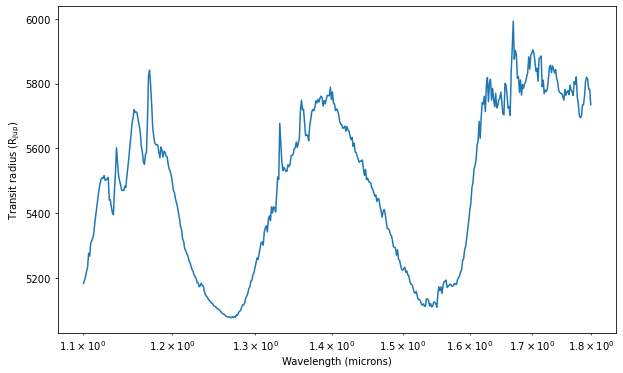

<Figure size 720x432 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

plt.plot(nc.c/atmosphere.freq/1e-4, (atmosphere.transm_rad/(1.31*nc.r_sun))**2*1e6)

plt.xscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Transit radius ($\rm R_{Jup}$)')
#plt.errorbar(wave,Rad*1e6,yerr=Rad_err*1e6,xerr=wave_err,ls='none',marker='o')
plt.show()
plt.clf()


In [21]:
atmosphere.__dict__

{'path': '/Users/s.baratuva.nl/Desktop/PhD/input_data',
 'wlen_bords_micron': [0.3, 15],
 'absorbers_present': True,
 'line_absorbers_present': True,
 'test_ck_shuffle_comp': False,
 'do_scat_emis': False,
 'stellar_intensity': None,
 'geometry': 'dayside_ave',
 'mu_star': 1.0,
 'semimajoraxis': None,
 'mode': 'c-k',
 'lbl_opacity_sampling': None,
 'line_species': ['H2O_HITEMP',
  'CO_all_iso_HITEMP',
  'CH4',
  'CO2',
  'Na_allard',
  'K_allard'],
 'rayleigh_species': ['H2', 'He'],
 'cloud_species': [],
 'H2H2CIA': True,
 'H2HeCIA': True,
 'N2N2CIA': False,
 'O2O2CIA': False,
 'CO2CO2CIA': False,
 'N2O2CIA': False,
 'H2H2temp': 30,
 'H2Hetemp': 30,
 'N2N2temp': 0,
 'O2O2temp': 0,
 'CO2O2temp': 0,
 'N2O2temp': 0,
 'H2H2wlen': 5000,
 'H2Hewlen': 5000,
 'N2N2wlen': 0,
 'O2O2wlen': 0,
 'CO2CO2wlen': 0,
 'N2O2wlen': 0,
 'Hminus': False,
 'freq_len': 3912,
 'g_len': 16,
 'freq_len_full': 7728,
 'freq': array([9.99111583e+14, 9.98112971e+14, 9.97115356e+14, ...,
        2.00427294e+13, 2.002

In [25]:
vars(atmosphere)

{'path': '/Users/s.baratuva.nl/Desktop/PhD/input_data',
 'wlen_bords_micron': [0.3, 15],
 'absorbers_present': True,
 'line_absorbers_present': True,
 'test_ck_shuffle_comp': False,
 'do_scat_emis': False,
 'stellar_intensity': None,
 'geometry': 'dayside_ave',
 'mu_star': 1.0,
 'semimajoraxis': None,
 'mode': 'c-k',
 'lbl_opacity_sampling': None,
 'line_species': ['H2O_HITEMP',
  'CO_all_iso_HITEMP',
  'CH4',
  'CO2',
  'Na_allard',
  'K_allard'],
 'rayleigh_species': ['H2', 'He'],
 'cloud_species': [],
 'H2H2CIA': True,
 'H2HeCIA': True,
 'N2N2CIA': False,
 'O2O2CIA': False,
 'CO2CO2CIA': False,
 'N2O2CIA': False,
 'H2H2temp': 30,
 'H2Hetemp': 30,
 'N2N2temp': 0,
 'O2O2temp': 0,
 'CO2O2temp': 0,
 'N2O2temp': 0,
 'H2H2wlen': 5000,
 'H2Hewlen': 5000,
 'N2N2wlen': 0,
 'O2O2wlen': 0,
 'CO2CO2wlen': 0,
 'N2O2wlen': 0,
 'Hminus': False,
 'freq_len': 3912,
 'g_len': 16,
 'freq_len_full': 7728,
 'freq': array([9.99111583e+14, 9.98112971e+14, 9.97115356e+14, ...,
        2.00427294e+13, 2.002

492 492


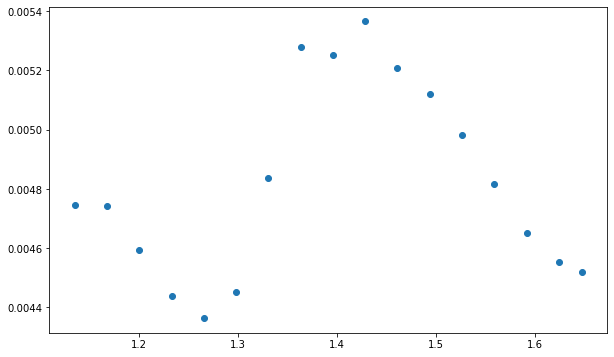

In [81]:
print(len((atmosphere.transm_rad/(1.31*nc.r_sun))**2),len(nc.c/atmosphere.freq/1e-4))
import numpy as np
wave,wave_err,Rad,Rad_err=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/v1298_spectra_emcee_new.txt',skiprows=0,unpack=True)
wavebins=np.zeros([len(wave),2])
#dw=(1.65-1.12)/17
dw=0.013969530897124827
for i in range(len(wave)):
    wavebins[i,0]=(wave[i]-wave_err[i])
    wavebins[i,1]=(wave[i]+wave_err[i])
#print (wavebins,wave,Rad,Rad_err)
#print (nc.c/atmosphere.freq/1e-4)
unbinned=nc.c/atmosphere.freq/1e-4
unbinned_rad=(atmosphere.transm_rad/(1.31*nc.r_sun))**2
binned_rad=np.zeros(len(wave))
for i in range(len(wavebins)):
    x=np.where(unbinned>wavebins[i,0])[0].tolist()
    y=np.where(unbinned<wavebins[i,1])[0].tolist()
#    print (len(x),len(y),wavebins[i,0],wavebins[i,1])
    index=np.intersect1d(x,y)
    binned_rad[i]=np.mean(unbinned_rad[index])
#    print (index)
plt.plot(wave,binned_rad,ls='none',marker='o')

In [ ]:
def rebin(wave,waverr,uninned_wave_unbinned_rad)

In [74]:
print (type(np.where(unbinned>1.12)[0]))
print (np.where(unbinned<1.14)[0])
x=np.where(unbinned>1.12)[0].tolist()
y=np.where(unbinned<1.14)[0].tolist()
print (np.intersect1d(x,y))

<class 'numpy.ndarray'>
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34]


In [72]:
x=[0,1,2,3,4]
y=[3,4,5,6]
print (np.intersect1d(x,y),type(x))

[3 4] <class 'list'>


#    Free chemistry retrieval

In [36]:
import numpy as np
import os
os.environ["pRT_input_data_path"] = "/Users/s.baratuva.nl/Desktop/PhD/input_data"
from petitRADTRANS import Radtrans
from petitRADTRANS import nat_cst as nc

In [37]:
atmosphere = Radtrans(line_species = ['H2O_HITEMP','CH4'],
                                      
                                      
                                      
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])
pressures = np.logspace(-6, 2, 50)
atmosphere.setup_opa_structure(pressures)

  Read line opacities of CH4...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.



In [9]:
def rebin(wave,wavebins,unbinned,unbinned_rad):
    binned_rad=np.zeros(len(wave))
    for i in range(len(wavebins)):
        x=np.where(unbinned>wavebins[i,0])[0].tolist()
        y=np.where(unbinned<wavebins[i,1])[0].tolist()
#    print (len(x),len(y),wavebins[i,0],wavebins[i,1])
        index=np.intersect1d(x,y)
        binned_rad[i]=np.mean(unbinned_rad[index])
    return binned_rad

In [10]:
def model_petit(R_star,MMW,P0,atmosphere,mass_fractions,temperature,Rpl,gravity):
    atmosphere.calc_transm(temperature, mass_fractions, 10**gravity, MMW, R_pl=Rpl, P0_bar=P0)
    unbinned=nc.c/atmosphere.freq/1e-4
    unbinned_rad=(atmosphere.transm_rad/(1.31*nc.r_sun))**2
    return unbinned,unbinned_rad


def lnlike(theta,wave,wavebins,Rad,Rad_err,Rstar,MMW,P0):
#     P,T,R=np.loadtxt('final_temp_pressure_profile.txt',unpack=True)
#     lmb=x
#     print 'theta',theta
 #    print (len(time),len(data_xshift),len(Forward),len(Include))
    temperature = theta[2] * np.ones_like(pressures)

    mass_fractions = {}
    fac=1.0#(1.0-10**(theta[0])-10**theta[1])
#    fac=1.0
#    fac_mmw=2.33
 #   fac_mmw=(2.0*fac*0.74+4.0*fac*0.24+18*10**theta[0]+16*10**theta[1])
    mass_fractions['H2'] = 0.74 * fac*np.ones_like(temperature)
    mass_fractions['He'] = 0.24 *fac* np.ones_like(temperature)
    mass_fractions['H2O_HITEMP'] = (10**theta[0]) * np.ones_like(temperature)
  #  mass_fractions['CO_all_iso_HITEMP'] = theta[1] * np.ones_like(temperature)
#    mass_fractions['CO2'] = theta[2] * np.ones_like(temperature)
    mass_fractions['CH4'] = (10**theta[1]) * np.ones_like(temperature)
 #   mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
 #   mass_fractions['K_allard'] = 0.000001 * np.ones_like(temperature)
    MMW =  2.33* MMW
    unbinned,unbinned_rad=model_petit(R_star,MMW,P0,atmosphere,mass_fractions,temperature,theta[3],theta[4])
    model=rebin(wave,wavebins,unbinned,unbinned_rad)
   # MMW =  2.33* MMW
    
    chisq=-0.5*sum(((model-Rad)/Rad_err)**2)
#     print chisq
    return chisq

def lnprior(theta):
    theta0=[-7,-12,300,0.7*nc.r_jup_mean,1.0]
    theta1=[-2,-5,1500,1.0*nc.r_jup_mean,4.0]
    b=True
    for i in range (len(theta)):
        b=b*((theta[i]>theta0[i]) and (theta[i]<theta1[i]))
  #      print (b)
    if (b==1):
        return 0.0
    else:
        return -np.inf
    
def lnprob(theta,wave,wavebins,Rad,Rad_err,R_star,MMW,P0):
    lp = lnprior(theta)
  #  print (lp)
    if (lp== -np.inf):
        
        return -np.inf
    else:
        return lnlike(theta,wave,wavebins,Rad,Rad_err,R_star,MMW,P0) 

In [12]:
ndim = 5
nwalkers =15
p0=[]
theta_val=[-3,-5,600,0.75*nc.r_jup_mean,2.0]
theta_err=[-2,-6,700,0.9*nc.r_jup_mean,3.0]
for i in range(nwalkers):
    f=np.array([]) 
  #  temp=[]
    for j in range (ndim):
        f=np.append(f,np.random.uniform(theta_val[j],theta_err[j]))
 #   f4=np.random.uniform(0.0,0.1)
#    f4=np.random.uniform(-0.05,0.05)
#    f=np.array([f0,f1,f2,f3])
    p0.append(f)
#print (p0)    

In [13]:
wave,wave_err,Rad,Rad_err=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/v1298_spectra_emcee_new.txt',skiprows=0,unpack=True)
wavebins=np.zeros([len(wave),2])
#dw=(1.65-1.12)/17
dw=0.013969530897124827
for i in range(len(wave)):
    wavebins[i,0]=(wave[i]-wave_err[i])
    wavebins[i,1]=(wave[i]+wave_err[i])
print (Rad,Rad_err)

R_star=1.31*nc.r_sun
P0 = 1.0
MMW = 1.0 * np.ones_like(pressures)

[0.00379928 0.00385735 0.00390708 0.00376746 0.00378207 0.00391894
 0.00397141 0.00421263 0.00414561 0.00413582 0.00395006 0.00382897
 0.00391558 0.0037846  0.00376684 0.0037516  0.00379966] [4.70141339e-05 3.88168214e-05 3.93704849e-05 3.86478207e-05
 4.07122117e-05 4.22248752e-05 4.05090578e-05 3.83149366e-05
 3.69194876e-05 3.87352610e-05 3.85542825e-05 4.19667931e-05
 3.52559624e-05 4.38825169e-05 4.78127383e-05 4.90002533e-05
 7.72975860e-05]


In [190]:
import multiprocessing as mp
mp.set_start_method('fork')

RuntimeError: context has already been set

In [43]:
import emcee
from multiprocessing import Pool
import time
import os
import multiprocessing as mp
mp.set_start_method('fork',force=True)
#os.environ["OMP_NUM_THREADS"] = "1"
with Pool() as pool:
    print ('Burnin phase')
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(wave,wavebins,Rad,Rad_err,R_star,MMW,P0),pool=pool)
#    print ('2')
    start=time.time()
#import time
#    print (start)
    p0, prob0, state0 = sampler.run_mcmc(p0,3000,progress=True)
    end=time.time()
    print (end-start)

  0%|          | 0/3000 [00:00<?, ?it/s]

Burnin phase


100%|██████████| 3000/3000 [06:45<00:00,  7.40it/s]


405.4044358730316


In [44]:
import emcee
from multiprocessing import Pool
import time
import os
import multiprocessing as mp
mp.set_start_method('fork',force=True)
#os.environ["OMP_NUM_THREADS"] = "1"
sampler.reset()
with Pool() as pool:
    print ('Production phase')
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(wave,wavebins,Rad,Rad_err,R_star,MMW,P0),pool=pool)
#    print ('2')
    start=time.time()
#import time
#    print (start)
  #  p0, prob0, state0 = sampler.run_mcmc(p0,10000,progress=True)
    pos, prob, state = sampler.run_mcmc(p0,10000,progress=True)
    end=time.time()
    print (end-start)

  0%|          | 0/10000 [00:00<?, ?it/s]

Production phase


100%|██████████| 10000/10000 [22:53<00:00,  7.28it/s]


1373.6696848869324


In [168]:
print("Running burn-in...")
start=time.time()
#import time
p0, prob0, state0 = sampler.run_mcmc(p0,10,progress=True)
#print (p0)
end=time.time()
sampler.reset()
print (end-start)

Running burn-in...


100%|██████████| 10/10 [00:04<00:00,  2.10it/s]

5.515557765960693


In [205]:
print("Running production...")
pos, prob, state = sampler.run_mcmc(p0,9000,progress=True)
print ('posterior',pos)
samples = sampler.flatchain
print ('samples',samples)
print ('prob',prob)

Running production...


ValueError: Pool not running

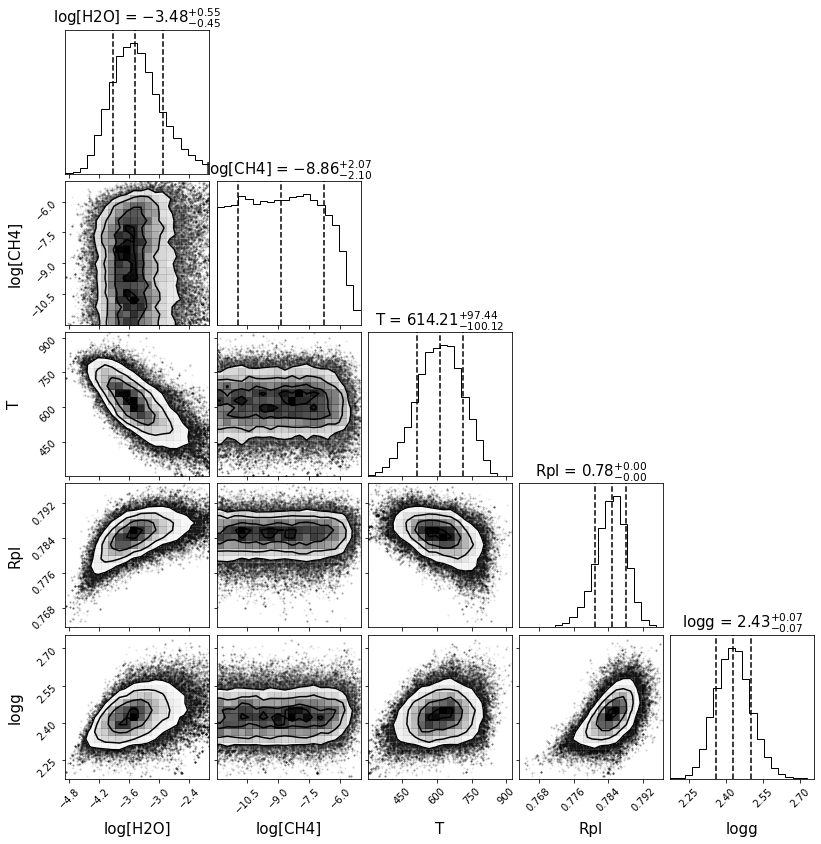

In [73]:
import corner
samples = sampler.flatchain
samples[:,3]=samples[:,3]*nc.r_jup_mean
lab=['log[H2O]','log[CH4]','T','Rpl','logg']
figure=corner.corner(samples,labels=lab,quantiles=[0.16,0.5,0.84],show_titles=True,title_kwargs={"fontsize": 15},label_kwargs={"fontsize": 15})

#print (samples[:,3])



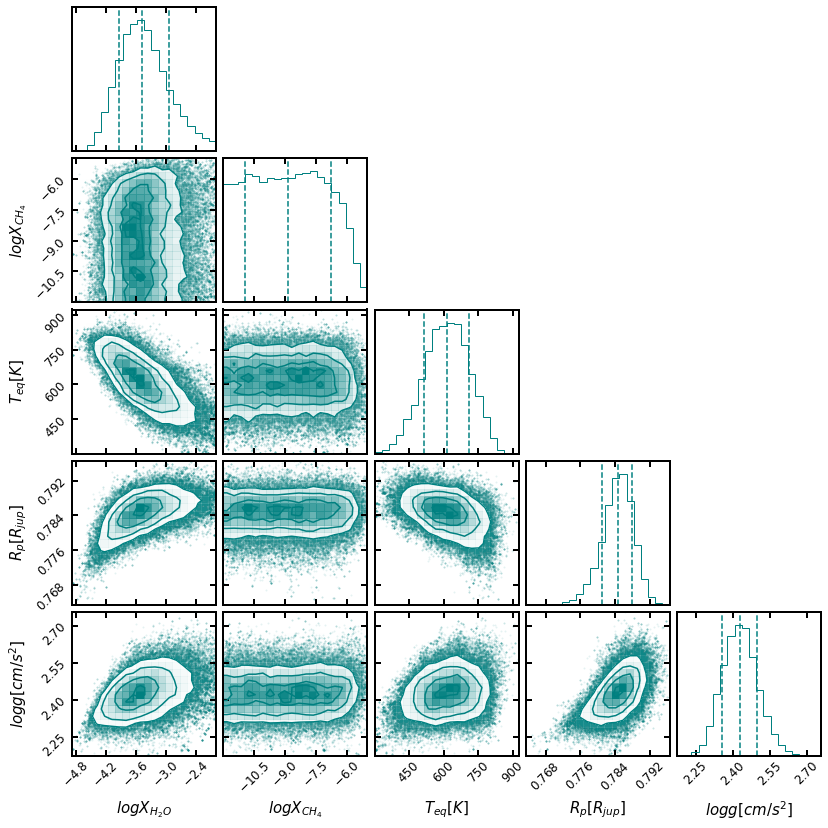

In [77]:
import corner
lab=[r'$logX_{H_{2}O}$',r'$logX_{CH_{4}}$',r'$T_{eq} [K]$',r'$R_{p} [R_{jup}]$',r'$logg [cm/s^{2}]$']
figure=corner.corner(samples,use_math_text=True,labels=lab,quantiles=[0.16,0.5,0.84],show_titles=False,title_kwargs={"fontsize": 15},label_kwargs={"fontsize": 15},color='teal')
ndim=5
axes = np.array(figure.axes).reshape((ndim, ndim))
#axes.subplots_adjust(wspace=0.0,hspace=0.0)
#figure.show()
for i in range(ndim):
    for j in range (i+1):
        ax=axes[i,j]
        ax.tick_params(which='major',direction='in',labelsize=12,length=6,width=2,top=True,right=True)
#ax.tick_params(which='minor',direction='in',labelsize=15,length=6,width=2,top=True,right=True)
#axs[1].tick_params('both',direction='in',labelsize=15,length=6,width=2,top=True,right=True)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2.0)
#axes[3,3].set_xlim(0.1e26,9e26)
plt.savefig('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/V1298_corner_free_retrieval.pdf',format='pdf')





In [46]:
g=10**2.43
R=0.85*nc.r_jup_mean
G=6.67*10**(-8)
M=(R**2)*g/G
print (M/nc.m_earth)

g=10**2.37
R=0.79*nc.r_jup_mean
G=6.67*10**(-8)
M=(R**2)*g/G
print (M/nc.m_earth)

g=10**2.50
R=0.79*nc.r_jup_mean
G=6.67*10**(-8)
M=(R**2)*g/G
print (M/nc.m_earth)

23.859904601227125
17.950850667589265
24.21503126152352


In [49]:
for i in range(5):
    q=np.quantile(samples[:,i],[0.16,0.5,0.84])
    print (q[1],q[0],q[2])

-3.480280702451848 -3.928995414349073 -2.932874783993058
-8.861402713397512 -10.964939965447726 -6.7897778851923825
614.2125833629767 514.0969727200426 711.6572827541742
0.7847966264093148 0.7810639215216704 0.7880252285459622
2.4267992419692237 2.356357122229326 2.4982883002662266


In [6]:
atmosphere = Radtrans(line_species = ['H2O_HITEMP',
                                      #'CO_all_iso_HITEMP',
                                      'CH4'],
                                     # 'CO2',
                                     # 'Na_allard',
                                     # 'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])

pressures = np.logspace(-6, 2, 50)

atmosphere.setup_opa_structure(pressures)

  Read line opacities of CH4...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.



In [5]:
import numpy as np
wave,wave_err,Rad,Rad_err=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/v1298_spectra_emcee_new.txt',skiprows=0,unpack=True)

0.9997601157080981 2.4521577224466737
2.290421471377711
  Read line opacities of CH4...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.

  Read line opacities of CH4...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.



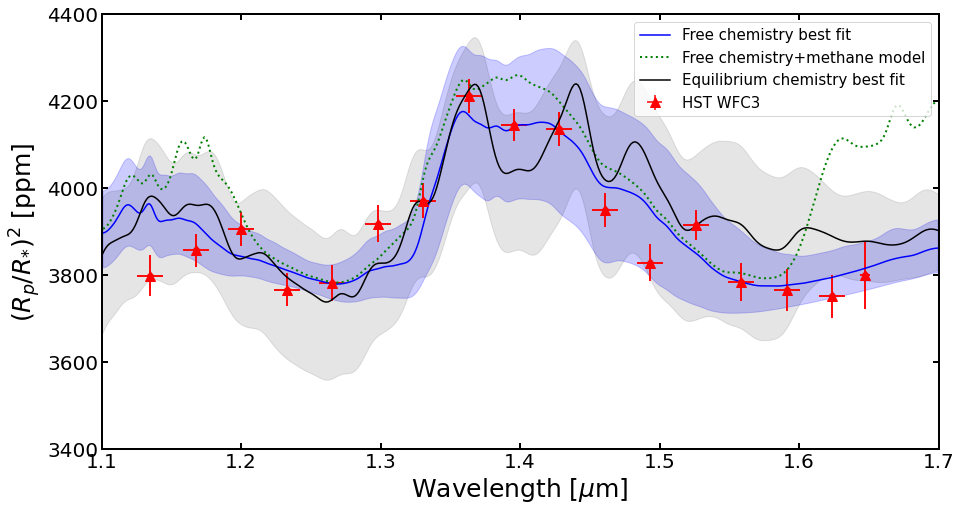

In [64]:
from scipy.ndimage import gaussian_filter as gauss
fig,ax=plt.subplots(1,1,figsize=(15,8))
temperature = 615.32 * np.ones_like(pressures)
fac=(1.0-10**(-3.62)-10**(-9))
#    fac=1.0
#    fac_mmw=2.33
fac_mmw=(2.0*fac*0.74+4.0*fac*0.24+18*10**(-3.15)+16*10**(-9))
mass_fractions = {}
mass_fractions['H2'] = 0.74*fac * np.ones_like(temperature)
mass_fractions['He'] = 0.24 *fac *np.ones_like(temperature)
mass_fractions['H2O_HITEMP'] = (10**-3.48) * np.ones_like(temperature)
#mass_fractions['CO_all_iso_HITEMP'] = 0.01 * np.ones_like(temperature)
#mass_fractions['CO2'] = 0.00001 * np.ones_like(temperature)
mass_fractions['CH4'] = (10**(-9.0)) * np.ones_like(temperature)
#mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
#mass_fractions['K_allard'] = 0.000001 * np.ones_like(temperature)

MMW = 2.33 * np.ones_like(temperature)
print(fac,fac_mmw)
from petitRADTRANS import nat_cst as nc
R_pl = 0.78479*nc.r_jup_mean
gravity = 10**2.4267
P0 = 1.0 # bar


atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)
rad_binned=rebin(wave,wavebins,nc.c/atmosphere.freq/1e-4,(atmosphere.transm_rad/(1.31*nc.r_sun))**2)
print (sum(((rad_binned-Rad)/Rad_err)**2)/(len(Rad)))
#print (((rad_binned-Rad)/Rad_err)**2)
#plt.errorbar(wave,rad_binned*1e6,yerr=Rad_err*1e6,ls='none',marker='o')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

plt.plot(nc.c/atmosphere.freq/1e-4, gauss((atmosphere.transm_rad/(1.31*nc.r_sun))**2*1e6,3),color='blue',label='Free chemistry best fit')
mass_fractions['CH4'] = (10**(-4.0)) * np.ones_like(temperature)

atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)
rad_binned=rebin(wave,wavebins,nc.c/atmosphere.freq/1e-4,(atmosphere.transm_rad/(1.31*nc.r_sun))**2)
#print (sum(((rad_binned-Rad)/Rad_err)**2)/(len(Rad)))
#print (((rad_binned-Rad)/Rad_err)**2)
#plt.errorbar(wave,rad_binned*1e6,yerr=Rad_err*1e6,ls='none',marker='o')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

plt.plot(nc.c/atmosphere.freq/1e-4, gauss((atmosphere.transm_rad/(1.31*nc.r_sun))**2*1e6,3),color='green',lw=2,ls='dotted',label='Free chemistry+methane model')

#plt.xscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Transit radius ($\rm R_{Jup}$)')
plt.errorbar(wave,Rad*1e6,yerr=Rad_err*1e6,xerr=wave_err,ls='none',marker='o',color='red')
#plt.show()
#plt.clf()


atmosphere_1 = Radtrans(line_species = ['H2O_HITEMP',
                                      #'CO_all_iso_HITEMP',
                                      'CH4'],
                                     # 'CO2',
                                     # 'Na_allard',
                                     # 'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])

pressures = np.logspace(-6, 2, 50)

atmosphere_1.setup_opa_structure(pressures)
temperature = 514.32 * np.ones_like(pressures)
fac_mmw=(2.0*fac*0.74+4.0*fac*0.24+18*10**(-3.66)+16*10**(-9))
mass_fractions = {}
mass_fractions['H2'] = 0.74 *fac* np.ones_like(temperature)
mass_fractions['He'] = 0.24 *fac* np.ones_like(temperature)
mass_fractions['H2O_HITEMP'] = (10**-4.06) * np.ones_like(temperature)
#mass_fractions['CO_all_iso_HITEMP'] = 0.01 * np.ones_like(temperature)
#mass_fractions['CO2'] = 0.00001 * np.ones_like(temperature)
mass_fractions['CH4'] = (10**(-11)) * np.ones_like(temperature)
#mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
#mass_fractions['K_allard'] = 0.000001 * np.ones_like(temperature)

MMW = 2.33 * np.ones_like(temperature)

from petitRADTRANS import nat_cst as nc
R_pl = 0.78106*nc.r_jup_mean
gravity = 10**2.3563
P0 = 1.0

atmosphere_1.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)




atmosphere_2 = Radtrans(line_species = ['H2O_HITEMP',
                                      #'CO_all_iso_HITEMP',
                                      'CH4'],
                                     # 'CO2',
                                     # 'Na_allard',
                                     # 'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])

pressures = np.logspace(-6, 2, 50)

atmosphere_2.setup_opa_structure(pressures)
temperature = 720.32 * np.ones_like(pressures)
fac_mmw=(2.0*fac*0.74+4.0*fac*0.24+18*10**(-3.0)+16*10**(-9))
mass_fractions = {}
mass_fractions['H2'] = 0.74 * np.ones_like(temperature)
mass_fractions['He'] = 0.24 * np.ones_like(temperature)
mass_fractions['H2O_HITEMP'] = (10**-3.0) * np.ones_like(temperature)
#mass_fractions['CO_all_iso_HITEMP'] = 0.01 * np.ones_like(temperature)
#mass_fractions['CO2'] = 0.00001 * np.ones_like(temperature)
mass_fractions['CH4'] = (10**(-6.178)) * np.ones_like(temperature)
#mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
#mass_fractions['K_allard'] = 0.000001 * np.ones_like(temperature)

MMW = 2.33 * np.ones_like(temperature)

from petitRADTRANS import nat_cst as nc
R_pl = 0.78802*nc.r_jup_mean
gravity = 10**2.4982
P0 = 1.0

atmosphere_2.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)

plt.fill_between(nc.c/atmosphere.freq/1e-4, gauss((atmosphere_1.transm_rad/(1.31*nc.r_sun))**2*1e6,3),gauss((atmosphere_2.transm_rad/(1.31*nc.r_sun))**2*1e6,3),color='blue',alpha=0.2)




##############################


import pickle
with open('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/v1298_b_platon_retrieval_hst_only_rp_free_result.pkl', 'rb') as f:
    result = pickle.load(f)
samples=result.flatchain
samples1=samples[5000:]
import numpy as np
wave,wave_err,Rad,Rad_err=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/v1298_spectra_emcee_new.txt',skiprows=0,unpack=True)


from platon.transit_depth_calculator import TransitDepthCalculator
from platon.constants import M_jup, R_jup, R_sun, M_earth
import matplotlib.pyplot as plt
# All inputs and outputs for PLATON are in SI
import numpy as np
Rs = 1.31 * R_sun
Mp = np.quantile(samples[5000:][:,3],0.5) #* M_earth
Rp = np.quantile(samples[5000:][:,4],0.5)#0.7529*R_jup#0.76 * R_jup
T =   np.quantile(samples[5000:][:,2],0.5)
Z= np.quantile(samples[5000:][:,0],0.5)
CO= np.quantile(samples[5000:][:,1],0.5)
#alpha= np.quantile(samples[2000:][:,6],0.5)
#z,mp,rp,
# The initializer loads all data files.  Create a TransitDepthCalculator
# object and hold on to it
calculator = TransitDepthCalculator(method="xsec") #"ktables" for correlated k

# compute_depths is fast once data files are loaded
wavelengths, depths, info_dict_best = calculator.compute_depths(Rs, Mp, Rp, T, logZ=Z, CO_ratio=CO,cloudtop_pressure=np.inf, full_output=True)
from scipy.ndimage import gaussian_filter
#fig,ax=plt.subplots(1,1,figsize=(15,8))
#plt.plot(wavelengths*1e6,gaussian_filter(depths*1e6,4),label='logZ=0.0, C/O=0.53')

#wavelengths, depths, info_dict = calculator.compute_depths(Rs, Mp, Rp, T, logZ=-1.0, CO_ratio=0.53, full_output=True)
from scipy.ndimage import gaussian_filter
#fig,ax=plt.subplots(1,1)
plt.plot(wavelengths*1e6,gaussian_filter(depths*1e6,5),label='Equilibrium chemistry best fit',color='black',ls='-')


from platon.abundance_getter import AbundanceGetter
getter = AbundanceGetter()
abundances = getter.get(Z, CO)

# Zero out CO.  (Note that if CO is a major component, you should probably
# renormalize the abundances of other species so that they add up to 1.)
#abundances["CO"] *= 0

# Set CH4 abundance to a constant throughout the atmosphere
#abundances["H2O"] *= 0
abundances["H2O"] *= 0
#abundances["NH3"]*=0
wavelengths0,depths0=calculator.compute_depths(Rs,Mp,Rp, T,
logZ=None, CO_ratio=None, custom_abundances=abundances,cloudtop_pressure=np.inf)
#plt.plot(wavelengths0*1e6,gaussian_filter(depths0*1e6,3),label='H2O supressed',ls='dotted',color='green',lw=2.5)

abundances = getter.get(Z, CO)

# Zero out CO.  (Note that if CO is a major component, you should probably
# renormalize the abundances of other species so that they add up to 1.)
#abundances["CO"] *= 0

# Set CH4 abundance to a constant throughout the atmosphere
#abundances["H2O"] *= 0
abundances["CH4"] *= 0
#abundances["CO2"] *= 0
wavelengths0,depths0=calculator.compute_depths(Rs,Mp,Rp, T,
logZ=None, CO_ratio=None, custom_abundances=abundances,cloudtop_pressure=np.inf)
#plt.plot(wavelengths0*1e6,gaussian_filter(depths0*1e6,5),label='CH4 supressed',ls='dotted',color='orange',lw=2.5)
#abundances["CO"]=*0
ax.set_xlim(1.1,1.7)

wfc3_offset=np.ones_like(wave)
wfc3=0.0
wfc3_offset=wfc3_offset*wfc3
wfc3_offset[0]=0.0
wfc3_offset[-1]=0
wfc3_offset[-2]=0.0
plt.errorbar(wave,(Rad)*1e6+wfc3_offset,yerr=(Rad_err)*1e6,xerr=wave_err,ls='none',marker='^',color='red',ms=10,label='HST WFC3')


Rs = 1.31 * R_sun
Mp = np.quantile(samples[5000:][:,3],0.84) #* M_earth
Rp = np.quantile(samples[5000:][:,4],0.84)#0.7529*R_jup#0.76 * R_jup
T =   np.quantile(samples[5000:][:,2],0.84)
Z= np.quantile(samples[5000:][:,0],0.84)
CO= np.quantile(samples[5000:][:,1],0.84)
#alpha= np.quantile(samples[2000:][:,6],0.84)
wavelengths, depths1, info_dict = calculator.compute_depths(1.31*R_sun, Mp, Rp, T, logZ=Z, CO_ratio=CO,cloudtop_pressure=np.inf, full_output=True)
#plt.semilogx(wavelengths*1e6,gaussian_filter(depths1*1e6,5),ls='--',color='black')

Rs = 1.31 * R_sun
Mp = np.quantile(samples[5000:][:,3],0.16) #* M_earth
Rp = np.quantile(samples[5000:][:,4],0.16)#0.75298*R_jup#0.76 * R_jup
T =   np.quantile(samples[5000:][:,2],0.16)
Z= np.quantile(samples[5000:][:,0],0.16)
CO= np.quantile(samples[5000:][:,1],0.16)
#alpha= np.quantile(samples[2000:][:,6],0.16)
wavelengths, depths2, info_dict = calculator.compute_depths(1.31*R_sun, Mp, Rp, T, logZ=Z, CO_ratio=CO,cloudtop_pressure=np.inf, full_output=True)
ax.fill_between(wavelengths*1e6,y1=gaussian_filter(depths2*1e6,5),y2=gaussian_filter(depths1*1e6,5),color='black',alpha=0.1)
ax.set_ylim(3400,4400)
ax.tick_params(which='major',direction='in',labelsize=20,length=6,width=2,top=True,right=True)
#ax.tick_params(which='minor',direction='in',labelsize=15,length=6,width=2,top=True,right=True)
#axs[1].tick_params('both',direction='in',labelsize=15,length=6,width=2,top=True,right=True)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.0)
ax.set_ylabel(r'$(R_{p}/R_{*})^{2}$ [ppm]',fontsize=25)
ax.set_xlabel(r'Wavelength [$\mu$m]',fontsize=25)


#plt.savefig('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/V1298_platon_model.pdf',format='pdf')

#plt.errorbar(w_spit,(rp_spit**2)*1e6,xerr=w_err_spit,yerr=2*rp_spit*rp_err_spit*1e6,ls='none',marker='s',ms=12,color='olive',label='Spitzer/Kepler')
#plt.errorbar(kepler[0],kepler[2]*1e6,xerr=kepler[1],yerr=kepler[3]*1e6,ls='none',marker='s',ms=12,color='olive')
ax.legend(loc='upper right',fontsize=15)

plt.savefig('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/V1298_equilibrium+free_model.pdf',format='pdf')


0.9997601157080981 2.5668449395169044
17.347244271696376 m / s2 1.2147997422950723e+27 kg 68365966.9 m
2331.8662966457473


Text(0, 0.5, 'Transit radius ($\\rm R_{Jup}$)')

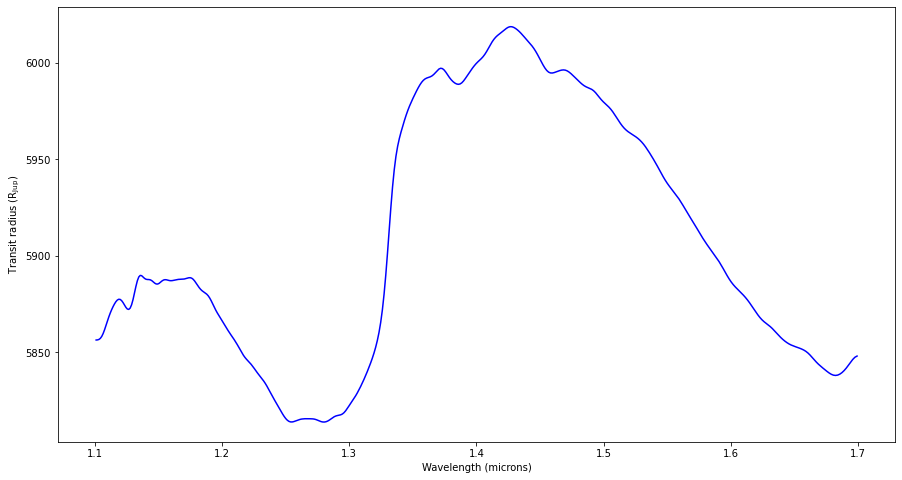

In [89]:
from scipy.ndimage import gaussian_filter as gauss
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(15,8))
temperature = 670.32 * np.ones_like(pressures)
fac=(1.0-10**(-3.62)-10**(-9))
#    fac=1.0
#    fac_mmw=2.33
fac_mmw=(2.0*fac*0.74+4.0*fac*0.24+18*10**(-2.15)+16*10**(-9))
mass_fractions = {}
mass_fractions['H2'] = 0.74*fac * np.ones_like(temperature)
mass_fractions['He'] = 0.24 *fac *np.ones_like(temperature)
mass_fractions['H2O_HITEMP'] = (10**-2.48) * np.ones_like(temperature)
#mass_fractions['CO_all_iso_HITEMP'] = 0.01 * np.ones_like(temperature)
#mass_fractions['CO2'] = 0.00001 * np.ones_like(temperature)
mass_fractions['CH4'] = (10**(-9.0)) * np.ones_like(temperature)
#mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
#mass_fractions['K_allard'] = 0.000001 * np.ones_like(temperature)

MMW = 2.33 * np.ones_like(temperature)
print(fac,fac_mmw)
from petitRADTRANS import nat_cst as nc
R_pl = 0.9779*nc.r_jup_mean
from astropy.constants import G,M_jup
import astropy.units as u
mass=0.64*M_jup
rad=(R_pl/100.0)*u.m
print (G*mass/rad**2,mass,rad)
gravity=(G*mass/rad**2).value*100
#gravity = 10**2.4267
P0 = 1.0 # bar
kappa_IR = 0.01
gamma = 0.4
T_int = 500.
T_equ = 1570.
#gravity=1500

temperature = nc.guillot_global(pressures, kappa_IR, gamma, gravity, T_int, T_equ)

atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)
rad_binned=rebin(wave,wavebins,nc.c/atmosphere.freq/1e-4,(atmosphere.transm_rad/(1.31*nc.r_sun))**2)
print (sum(((rad_binned-Rad)/Rad_err)**2)/(len(Rad)))
#print (((rad_binned-Rad)/Rad_err)**2)
#plt.errorbar(wave,rad_binned*1e6,yerr=Rad_err*1e6,ls='none',marker='o')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

plt.plot(nc.c/atmosphere.freq/1e-4, gauss((atmosphere.transm_rad/(1.31*nc.r_sun))**2*1e6,3),color='blue',label='Free chemistry best fit')
mass_fractions['CH4'] = (10**(-4.0)) * np.ones_like(temperature)

atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)
rad_binned=rebin(wave,wavebins,nc.c/atmosphere.freq/1e-4,(atmosphere.transm_rad/(1.31*nc.r_sun))**2)
#print (sum(((rad_binned-Rad)/Rad_err)**2)/(len(Rad)))
#print (((rad_binned-Rad)/Rad_err)**2)
#plt.errorbar(wave,rad_binned*1e6,yerr=Rad_err*1e6,ls='none',marker='o')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

#plt.plot(nc.c/atmosphere.freq/1e-4, gauss((atmosphere.transm_rad/(1.31*nc.r_sun))**2*1e6,3),color='green',lw=2,ls='dotted',label='Free chemistry+methane model')

#plt.xscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Transit radius ($\rm R_{Jup}$)')
#plt.errorbar(wave,Rad*1e6,yerr=Rad_err*1e6,xerr=wave_err,ls='none',marker='o',color='red')

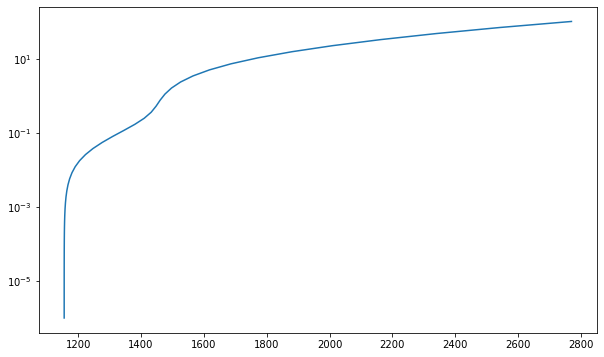

In [83]:
plt.semilogy(temperature,pressures)

In [ ]:
import matplotlib.pyplot as pl
xl = np.linspace(1.1,1.7,100)
for m, b, lnf in samples[np.random.randint(len(samples), size=100)]:
    pl.plot(xl, m*xl+b, color="k", alpha=0.1)
pl.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
pl.errorbar(x, y, yerr=yerr, fmt=".k")

In [33]:
#samples=result.flatchain
samples1=samples[5000:]
theta=[]
for i in range(5):
    q=np.quantile(samples1[:,i],[0.16,0.5,0.84])
    print (q[1],q[0],q[2])
    theta.append(q[1])
#import pickle 
#with open("/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/v1298_b_platon_retrieval_hst_only_rp_free_result.pkl", "wb") as f:
#    pickle.dump(result, f)
print (min(samples1[:,1]),max(samples1[:,1]))

-3.389177455940238 -3.867435553784104 -2.7896154090138876
-6.87405514070583 -7.639765175322543 -5.993869506759087
601.4285290231269 494.50641652868273 699.9650223934848
0.7850649107652808 0.7815523554776996 0.7882356913207501
2.4302333481534717 2.3617347049271884 2.504256180721953
-7.999975923066103 -4.11283947405269


In [35]:
print (lnlike(theta,wave,wavebins,Rad,Rad_err,R_star,MMW,P0)*(-2.0/ndim))

30357.58450581201


In [163]:
import time
start=time.time()
theta=[1e-3,1e-4,700,0.8*nc.r_jup_mean,1.5]
x=lnprob(theta,wave,wavebins,Rad,Rad_err,R_star,MMW,P0)
end=time.time()
print (end-start)

0.00011515617370605469


In [170]:
from multiprocessing import pool

In [172]:
from multiprocessing import cpu_count

ncpu = cpu_count()
print("{0} CPUs".format(ncpu))

16 CPUs


In [240]:
x,y=model_petit(R_star,MMW,P0,atmosphere,mass_fractions,temperature,Rpl,gravity)

NameError: name 'Rpl' is not defined

# Equilibrium chemistry retrieval

In [5]:
import numpy as np
import os
os.environ["pRT_input_data_path"] = "/Users/s.baratuva.nl/Desktop/PhD/input_data"
from petitRADTRANS import Radtrans
from petitRADTRANS.poor_mans_nonequ_chem import interpol_abundances

In [88]:
atmosphere = Radtrans(line_species = ['H2O_HITEMP',
                                      #'CO_all_iso_HITEMP',
                                      'CH4'],
                                     # 'CO2',
                                     # 'Na_allard',
                                     # 'K_allard'],
                      rayleigh_species = ['H2', 'He','H'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.8])

  Read line opacities of CH4...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.



In [89]:
pressures = np.logspace(-2, -2.1, 50)
atmosphere.setup_opa_structure(pressures)

In [95]:
COs = 0.53 * np.ones_like(pressures)
FeHs = 0.0 * np.ones_like(pressures)
temperature = 700. * np.ones_like(pressures)
mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures)
from petitRADTRANS import nat_cst as nc
R_pl = 0.77*nc.r_jup_mean
P0=0.01
gravity = 1000.0
P0 = 1.0 # bar
       #     FeHs, \
       #     temperature, \
       #     pressures)
mass_fractions['H2O_HITEMP'] = mass_fractions.pop('H2O')
#print (mass_fractions.keys(),(mass_fractions['MMW']))
print (mass_fractions['H2O_HITEMP'],mass_fractions['CH4'])

[0.00535306 0.0053529  0.00535274 0.00535258 0.00535242 0.00535226
 0.0053521  0.00535194 0.00535179 0.00535163 0.00535148 0.00535132
 0.00535117 0.00535102 0.00535087 0.00535071 0.00535056 0.00535041
 0.00535026 0.00535012 0.00534997 0.00534982 0.00534967 0.00534953
 0.00534938 0.00534924 0.0053491  0.00534895 0.00534881 0.00534867
 0.00534853 0.00534839 0.00534825 0.00534811 0.00534797 0.00534783
 0.0053477  0.00534756 0.00534742 0.00534729 0.00534715 0.00534702
 0.00534689 0.00534675 0.00534662 0.00534649 0.00534636 0.00534623
 0.0053461  0.00534597] [0.00315163 0.00315148 0.00315134 0.0031512  0.00315105 0.00315091
 0.00315077 0.00315063 0.00315049 0.00315035 0.00315021 0.00315008
 0.00314994 0.0031498  0.00314967 0.00314953 0.0031494  0.00314926
 0.00314913 0.003149   0.00314887 0.00314874 0.00314861 0.00314848
 0.00314835 0.00314822 0.00314809 0.00314796 0.00314783 0.00314771
 0.00314758 0.00314746 0.00314733 0.00314721 0.00314708 0.00314696
 0.00314684 0.00314672 0.0031466  0.00

# Metallicity calculation

In [96]:
mass_frac=(10**-3.45)/(0.99*0.74)
mass_frac_up=(10**-3.0)/(0.99*0.74)
mass_frac_low=(10**-4.0)/(0.99*0.74)
mass_frac_solar=16*7.008E-04/(1*9.271E-01)
print (mass_frac/mass_frac_solar)
print (mass_frac_up/mass_frac_solar)
print (mass_frac_low/mass_frac_solar)
#print (mass_frac/(mass_fractions['H2O_HITEMP'][0]/mass_fractions['H2'][0]))
#print (mass_frac_up/(mass_fractions['H2O_HITEMP'][0]/mass_fractions['H2'][0]))
#print (mass_frac_low/(mass_fractions['H2O_HITEMP'][0]/mass_fractions['H2'][0]))
#print (mass_frac)
mass_water=11*10**-3.0
mass_hhe=11-mass_water
#print (mass_water)
mass_hhe_new=mass_hhe-5
fh=0.74*mass_hhe_new
fh2o=mass_water
#print (fh2o,10**-3.15)
print( (fh2o/fh)/(mass_fractions['H2O_HITEMP'][0]/mass_fractions['H2'][0]))

0.04004475039018427
0.11286144098644098
0.0112861440986441
0.34157857131267455


# fortney paper calculation

In [122]:
solar_oh=7.008E-04/(9.271E-01)
z_x=(10**-3.45)/(0.99*0.74)
o_h=z_x*(2.0/18.0)/(2+2*(z_x*2.0/18.0))
print (o_h/solar_oh)

0.03559341827667347


In [100]:
import numpy as np
MMW=mass_fractions['MMW']
wave,wave_err,Rad,Rad_err=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/v1298_spectra_emcee_new.txt',skiprows=0,unpack=True)
atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)
print (atmosphere.transm_rad/1e-4)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

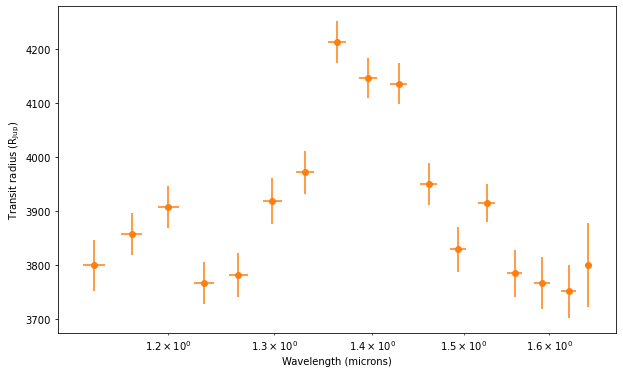

<Figure size 720x432 with 0 Axes>

In [101]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

plt.plot(nc.c/atmosphere.freq/1e-4, (atmosphere.transm_rad/(1.31*nc.r_sun))**2*1e6)

plt.xscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Transit radius ($\rm R_{Jup}$)')
plt.errorbar(wave,Rad*1e6,yerr=Rad_err*1e6,xerr=wave_err,ls='none',marker='o')
plt.show()
plt.clf()


In [217]:
atmosphere = Radtrans(line_species = ['H2O_HITEMP','CH4'],
                                      
                                      
                                      
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])
pressures = np.logspace(-6, 2, 50)
atmosphere.setup_opa_structure(pressures)

  Read line opacities of CH4...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.



In [37]:
def rebin(wave,wavebins,unbinned,unbinned_rad):
    binned_rad=np.zeros(len(wave))
    for i in range(len(wavebins)):
        x=np.where(unbinned>wavebins[i,0])[0].tolist()
        y=np.where(unbinned<wavebins[i,1])[0].tolist()
#    print (len(x),len(y),wavebins[i,0],wavebins[i,1])
        index=np.intersect1d(x,y)
        binned_rad[i]=np.mean(unbinned_rad[index])
    return binned_rad

In [63]:
COs = 0.55 * np.ones_like(pressures)
FeHs = -0.73 * np.ones_like(pressures)
temperature = 600 * np.ones_like(pressures)
mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures)
print (mass_fractions['H2O'])

[0.0003155  0.0003371  0.00037148 0.00042114 0.00048883 0.0005701
 0.0006612  0.00074858 0.00082353 0.0008799  0.00091664 0.00093924
 0.0009509  0.00095726 0.00096012 0.00096163 0.00096226 0.00096259
 0.00096273 0.0009628  0.00096282 0.00096283 0.00096284 0.00096284
 0.00096283 0.00096283 0.00096283 0.00096283 0.00096282 0.00096282
 0.00096282 0.00096281 0.00096281 0.0009628  0.0009628  0.00096279
 0.00096278 0.00096277 0.00096276 0.00096275 0.00096273 0.00096271
 0.00096269 0.00096266 0.00096263 0.00096259 0.00096254 0.00096249
 0.00096242 0.00096234]


In [43]:
def model_petit_eq(R_star,MMW,P0,atmosphere,mass_fractions,temperature,Rpl,gravity):
    atmosphere.calc_transm(temperature, mass_fractions, 10**gravity, MMW, R_pl=Rpl, P0_bar=P0)
    unbinned=nc.c/atmosphere.freq/1e-4
    unbinned_rad=(atmosphere.transm_rad/(R_star))**2
    return unbinned,unbinned_rad


def lnlike_eq(theta,wave,wavebins,Rad,Rad_err,Rstar,P0):
#     P,T,R=np.loadtxt('final_temp_pressure_profile.txt',unpack=True)
#     lmb=x
#     print 'theta',theta
 #    print (len(time),len(data_xshift),len(Forward),len(Include))
   # temperature = theta[2] * np.ones_like(pressures)
    COs = theta[1] * np.ones_like(pressures)
    FeHs = theta[0] * np.ones_like(pressures)
    temperature = theta[2] * np.ones_like(pressures)
    mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures)
    mass_fractions['H2O_HITEMP'] = mass_fractions.pop('H2O')
    MMW=mass_fractions['MMW']
   # mass_fractions = {}
#    mass_fractions['H2'] = 0.74 * np.ones_like(temperature)
#    mass_fractions['He'] = 0.24 * np.ones_like(temperature)
#    mass_fractions['H2O_HITEMP'] = (10**theta[0]) * np.ones_like(temperature)
  #  mass_fractions['CO_all_iso_HITEMP'] = theta[1] * np.ones_like(temperature)
#    mass_fractions['CO2'] = theta[2] * np.ones_like(temperature)
 #   mass_fractions['CH4'] = (10**theta[1]) * np.ones_like(temperature)
 #   mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
 #   mass_fractions['K_allard'] = 0.000001 * np.ones_like(temperature)
    unbinned,unbinned_rad=model_petit_eq(R_star,MMW,P0,atmosphere,mass_fractions,temperature,theta[3],theta[4])
    model=rebin(wave,wavebins,unbinned,unbinned_rad)
 #   MMW = 2.33 * np.ones_like(temperature)
    
    chisq=-0.5*sum(((model-Rad)/Rad_err)**2)
#     print chisq
    return chisq

def lnprior_eq(theta):
    theta0=[-2.0,0.2,300,0.7*nc.r_jup_mean,1.5]
    theta1=[1,2.0,1500,1.0*nc.r_jup_mean,4.0]
    b=True
    for i in range (len(theta)):
        b=b*((theta[i]>theta0[i]) and (theta[i]<theta1[i]))
  #      print (b)
    if (b==1):
        return 0.0
    else:
        return -np.inf
    
def lnprob_eq(theta,wave,wavebins,Rad,Rad_err,R_star,P0):
    lp = lnprior_eq(theta)
  #  print (lp)
    if (lp== -np.inf):
        
        return -np.inf
    else:
        return lnlike_eq(theta,wave,wavebins,Rad,Rad_err,R_star,P0) 

In [44]:
ndim = 5
nwalkers =15
p0=[]
theta_val=[-0.5,0.3,600,0.7*nc.r_jup_mean,2.0]
theta_err=[0.5,0.7,700,0.8*nc.r_jup_mean,3.0]
for i in range(nwalkers):
    f=np.array([]) 
  #  temp=[]
    for j in range (ndim):
        f=np.append(f,np.random.uniform(theta_val[j],theta_err[j]))
 #   f4=np.random.uniform(0.0,0.1)
#    f4=np.random.uniform(-0.05,0.05)
#    f=np.array([f0,f1,f2,f3])
    p0.append(f)
print (p0)

[array([1.52089633e-01, 3.29502395e-01, 6.65986299e+02, 5.06683265e+09,
       2.02356885e+00]), array([2.22434444e-01, 5.26534714e-01, 6.06946600e+02, 5.37753688e+09,
       2.29989916e+00]), array([2.99155794e-01, 5.63606420e-01, 6.38850078e+02, 5.03068136e+09,
       2.13111896e+00]), array([-4.50153402e-01,  4.54311265e-01,  6.08105977e+02,  5.09565921e+09,
        2.30340699e+00]), array([-4.81460085e-01,  6.89446328e-01,  6.83385006e+02,  5.44593997e+09,
        2.69261635e+00]), array([-2.19672944e-01,  5.67854688e-01,  6.91206514e+02,  4.97575865e+09,
        2.84280035e+00]), array([3.82639320e-01, 3.59818344e-01, 6.14683573e+02, 5.54018602e+09,
       2.72352860e+00]), array([-3.41410166e-01,  4.24490255e-01,  6.55504619e+02,  5.55208948e+09,
        2.17690432e+00]), array([1.33487372e-01, 4.53560606e-01, 6.05115868e+02, 4.93013146e+09,
       2.78135655e+00]), array([3.55325586e-01, 5.88087838e-01, 6.56464933e+02, 5.19565275e+09,
       2.89520909e+00]), array([-2.07732046e

In [40]:
wave,wave_err,Rad,Rad_err=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/v1298_spectra_emcee_new.txt',skiprows=0,unpack=True)
wavebins=np.zeros([len(wave),2])
#dw=(1.65-1.12)/17
dw=0.013969530897124827
for i in range(len(wave)):
    wavebins[i,0]=(wave[i]-wave_err[i])
    wavebins[i,1]=(wave[i]+wave_err[i])
print (Rad,Rad_err)

R_star=1.31*nc.r_sun
P0 = 1.0
#MMW = 2.33 * np.ones_like(pressures)

[0.00379928 0.00385735 0.00390708 0.00376746 0.00378207 0.00391894
 0.00397141 0.00421263 0.00414561 0.00413582 0.00395006 0.00382897
 0.00391558 0.0037846  0.00376684 0.0037516  0.00379966] [4.70141339e-05 3.88168214e-05 3.93704849e-05 3.86478207e-05
 4.07122117e-05 4.22248752e-05 4.05090578e-05 3.83149366e-05
 3.69194876e-05 3.87352610e-05 3.85542825e-05 4.19667931e-05
 3.52559624e-05 4.38825169e-05 4.78127383e-05 4.90002533e-05
 7.72975860e-05]


In [232]:
import emcee
from multiprocessing import Pool
import time
import os
import multiprocessing as mp
mp.set_start_method('fork',force=True)
#os.environ["OMP_NUM_THREADS"] = "1"
with Pool() as pool:
    print ('Burnin phase')
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob_eq, args=(wave,wavebins,Rad,Rad_err,R_star,P0),pool=pool)
#    print ('2')
    start=time.time()
#import time
#    print (start)
    p0, prob0, state0 = sampler.run_mcmc(p0,5000,progress=True)
    end=time.time()
    print (end-start)

Burnin phase


100%|██████████| 5000/5000 [12:04<00:00,  6.90it/s]


724.9654982089996


In [224]:
samples=sampler.flatchain
print (min(samples[:,0]))

-0.9953550406507926


In [242]:
import emcee
from multiprocessing import Pool
import time
import os
import multiprocessing as mp
mp.set_start_method('fork',force=True)
#os.environ["OMP_NUM_THREADS"] = "1"
sampler.reset()
with Pool() as pool:
    print ('Production phase')
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob_eq, args=(wave,wavebins,Rad,Rad_err,R_star,P0),pool=pool)
#    print ('2')
    start=time.time()
#import time
#    print (start)
  #  p0, prob0, state0 = sampler.run_mcmc(p0,10000,progress=True)
    pos, prob, state = sampler.run_mcmc(p0,25000,progress=True)
    end=time.time()
    print (end-start)

Production phase


100%|██████████| 25000/25000 [1:28:00<00:00,  4.73it/s]      


5280.3656640052795


In [140]:
import time
start=time.time()
theta=[0.0,0.55,700,0.8*nc.r_jup_mean,1.5]
x=lnprob_eq(theta,wave,wavebins,Rad,Rad_err,R_star,P0)
end=time.time()
print (end-start)

0.05447220802307129


[[8.24688136e-01 4.72461292e-01 8.19292929e+02 7.50086620e-01
  2.60712011e+00]
 [2.13261563e+00 5.19882307e-01 7.77281847e+02 7.62578971e-01
  2.45731717e+00]
 [1.87784923e-01 3.97357806e-01 8.42470697e+02 7.65196305e-01
  2.69391973e+00]
 ...
 [1.33937707e+00 5.95988990e-01 8.24012877e+02 7.55238188e-01
  2.61948597e+00]
 [1.15524249e+00 5.20511903e-01 8.43921537e+02 7.57791592e-01
  2.67100249e+00]
 [2.26633745e+00 6.58291017e-01 7.70671957e+02 7.47593268e-01
  2.28466754e+00]]


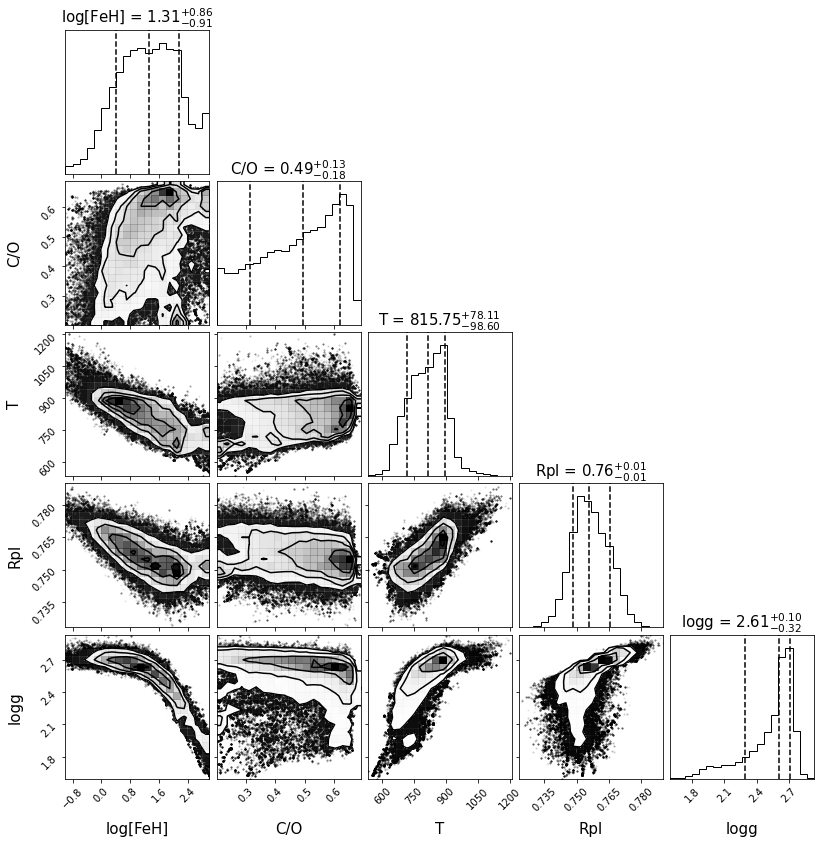

In [243]:
import corner
samples = sampler.flatchain
samples[:,3]=samples[:,3]/nc.r_jup_mean
lab=['log[FeH]','C/O','T','Rpl','logg']
figure=corner.corner(samples,labels=lab,quantiles=[0.16,0.5,0.84],show_titles=True,title_kwargs={"fontsize": 15},label_kwargs={"fontsize": 15})

print (samples)

In [80]:
g=10**2.61
R=0.76*nc.r_jup_mean
G=6.67*10**(-8)
M=(R**2)*g/G
print (M/nc.m_earth)

g=10**2.71
R=0.76*nc.r_jup_mean
G=6.67*10**(-8)
M=(R**2)*g/G
print (M/nc.m_earth)

g=10**2.29
R=0.76*nc.r_jup_mean
G=6.67*10**(-8)
M=(R**2)*g/G
print (M/nc.m_earth)

28.87074800384126
36.3461183195415
13.818408782502177


In [241]:
temperature = 605. * np.ones_like(pressures)
COs = 0.55 * np.ones_like(pressures)
FeHs = 0.5 * np.ones_like(pressures)
mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures)
print (mass_fractions['H2O'],mass_fractions['CH4'])

[0.00454208 0.00456785 0.00461917 0.00472221 0.00490859 0.00522701
 0.0057283  0.00645788 0.00745485 0.00870718 0.01013443 0.01162305
 0.01294377 0.014046   0.0147756  0.01526276 0.01550813 0.01564933
 0.01571152 0.01574476 0.01575935 0.01576663 0.01576983 0.01577127
 0.01577181 0.0157719  0.01577176 0.01577146 0.01577106 0.01577054
 0.01576991 0.01576916 0.01576823 0.01576715 0.01576584 0.01576429
 0.01576242 0.01576023 0.01575761 0.01575453 0.01575089 0.01574664
 0.01574169 0.01573594 0.01572938 0.01572182 0.01571341 0.01570383
 0.0156935  0.0156819 ] [1.34378625e-05 2.78154157e-05 5.87770854e-05 1.19322120e-04
 2.41004892e-04 4.60664598e-04 8.46180250e-04 1.44913870e-03
 2.32047286e-03 3.45180334e-03 4.74592068e-03 6.09988942e-03
 7.28069526e-03 8.25677803e-03 8.89080360e-03 9.31050100e-03
 9.51986024e-03 9.63998070e-03 9.69277580e-03 9.72100729e-03
 9.73344873e-03 9.73972121e-03 9.74256154e-03 9.74393317e-03
 9.74457362e-03 9.74486649e-03 9.74500530e-03 9.74506433e-03
 9.74509282e-

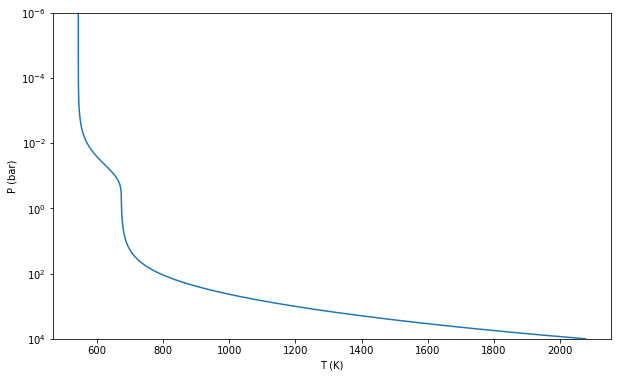

<Figure size 720x432 with 0 Axes>

In [116]:
pressures = np.logspace(-6, 4, 100)
kappa_IR = 0.01
gamma = 0.4
T_int = 100.
T_equ = 700.

temperature = nc.guillot_global(pressures, kappa_IR, gamma, gravity, T_int, T_equ)

plt.plot(temperature, pressures)
plt.yscale('log')
plt.ylim([1e4, 1e-6])
plt.xlabel('T (K)')
plt.ylabel('P (bar)')
plt.show()
plt.clf()


  Read line opacities of CH4...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.

[0.00104645 0.00158741 0.00236987 0.00346673 0.00494901 0.00687318
 0.00926935 0.01213411 0.01542969 0.01908748 0.02301291 0.02708968
 0.03101429 0.03481862 0.03836618 0.0415342  0.04423187 0.04641555
 0.04809433 0.0493227  0.05018279 0.05076364 0.05114531 0.05137693
 0.05152985 0.05162963 0.05169091 0.05172932 0.05175645 0.0517757
 0.05178716 0.05179476 0.05180024 0.05180377 0.05180572 0.05180702
 0.05180911 0.05181051 0.05181106 0.05181151 0.05181065 0.05180952
 0.0518085  0.05180731 0.05180659 0.05180657 0.05180601 0.05180517
 0.0518055  0.05180459 0.05180459 0.05180557 0.05180669 0.05180762
 0.05180827 0.05180868 0.05180889 0.05180902 0.05180908 0.05180911
 0.05180911 0.0518091  0.05180907 0.05180905 0.05180902 0.051809
 0.05180897 0.05180895 0.05180894 0.05180893 0.05180892 0.05180892
 0.05180892 0.05180907 0.05180905 0.05180902 0.05180908 0.05180918
 0.0518093  0.05

"\natmosphere_1 = Radtrans(line_species = ['H2O_HITEMP',\n                                      #'CO_all_iso_HITEMP',\n                                      'CH4'],\n                                     # 'CO2',\n                                     # 'Na_allard',\n                                     # 'K_allard'],\n                      rayleigh_species = ['H2', 'He'],\n                      continuum_opacities = ['H2-H2', 'H2-He'],\n                      wlen_bords_micron = [1.1, 1.7])\n\npressures = np.logspace(-6, 2, 50)\n\natmosphere_1.setup_opa_structure(pressures)\n\ntemperature = 890.75 * np.ones_like(pressures)\n\nCOs = 0.62 * np.ones_like(pressures)\nFeHs = (2.2) * np.ones_like(pressures)\n#temperature = 700. * np.ones_like(pressures)\nmass_fractions = interpol_abundances(COs,FeHs,temperature,pressures)\nfrom petitRADTRANS import nat_cst as nc\n#R_pl = 0.77*nc.r_jup_mean\n#gravity = 450.0\n#P0 = 1.0 # bar\n       #     FeHs,        #     temperature,        #     pressures)\

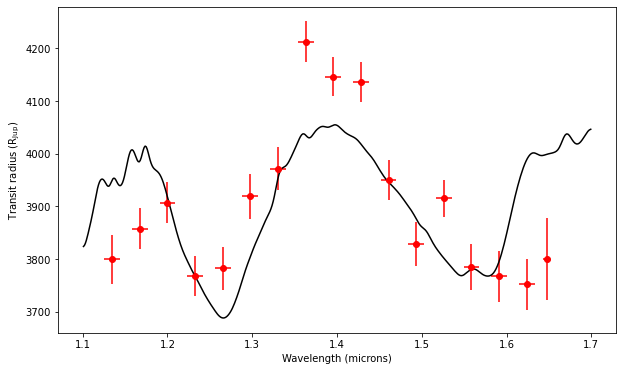

In [121]:
from scipy.ndimage import gaussian_filter as gauss

atmosphere = Radtrans(line_species = ['H2O_HITEMP',
                                      'CO_all_iso_HITEMP',
                                      'CH4'],
                                     # 'CO2',
                                     # 'Na_allard',
                                     # 'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])

#pressures = np.logspace(-6, 2, 50)

atmosphere.setup_opa_structure(pressures)
#temperature = 815.75 * np.ones_like(pressures)

COs = 0.5 * np.ones_like(pressures)
FeHs = (1.31) * np.ones_like(pressures)
#temperature = 700. * np.ones_like(pressures)
mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures)
print(mass_fractions['CH4'])
kzz=1e15*np.ones_like(pressures)
from petitRADTRANS import nat_cst as nc
#R_pl = 0.77*nc.r_jup_mean
#gravity = 450.0
#P0 = 1.0 # bar
       #     FeHs, \
       #     temperature, \
       #     pressures)
mass_fractions['H2O_HITEMP'] = mass_fractions.pop('H2O')
mass_fractions['CO_all_iso_HITEMP'] = mass_fractions.pop('CO')
print (mass_fractions['CO_all_iso_HITEMP'])
#MMW = 2.33 * np.ones_like(temperature)
MMW=mass_fractions['MMW']
from petitRADTRANS import nat_cst as nc
R_pl = 0.76*nc.r_jup_mean
gravity = 10**2.61
P0 = 1.0 # bar


atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0,Kzz=kzz)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

plt.plot(nc.c/atmosphere.freq/1e-4, gauss((atmosphere.transm_rad/(1.31*nc.r_sun))**2*1e6,3),color='black')
rad_binned=rebin(wave,wavebins,nc.c/atmosphere.freq/1e-4,(atmosphere.transm_rad/(1.31*nc.r_sun))**2)
print (sum(((rad_binned-Rad)/Rad_err)**2)/(len(Rad)))
#plt.xscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Transit radius ($\rm R_{Jup}$)')
plt.errorbar(wave,Rad*1e6,yerr=Rad_err*1e6,xerr=wave_err,ls='none',marker='o',color='red')
#plt.show()
#plt.clf()

'''
atmosphere_1 = Radtrans(line_species = ['H2O_HITEMP',
                                      #'CO_all_iso_HITEMP',
                                      'CH4'],
                                     # 'CO2',
                                     # 'Na_allard',
                                     # 'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])

pressures = np.logspace(-6, 2, 50)

atmosphere_1.setup_opa_structure(pressures)

temperature = 890.75 * np.ones_like(pressures)

COs = 0.62 * np.ones_like(pressures)
FeHs = (2.2) * np.ones_like(pressures)
#temperature = 700. * np.ones_like(pressures)
mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures)
from petitRADTRANS import nat_cst as nc
#R_pl = 0.77*nc.r_jup_mean
#gravity = 450.0
#P0 = 1.0 # bar
       #     FeHs, \
       #     temperature, \
       #     pressures)
mass_fractions['H2O_HITEMP'] = mass_fractions.pop('H2O')

#MMW = 2.33 * np.ones_like(temperature)
MMW=mass_fractions['MMW']
from petitRADTRANS import nat_cst as nc
R_pl = 0.77*nc.r_jup_mean
gravity = 10**2.71
P0 = 1.0 # bar



atmosphere_1.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)




atmosphere_2 = Radtrans(line_species = ['H2O_HITEMP',
                                      #'CO_all_iso_HITEMP',
                                      'CH4'],
                                     # 'CO2',
                                     # 'Na_allard',
                                     # 'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])

pressures = np.logspace(-6, 2, 50)

atmosphere_2.setup_opa_structure(pressures)
temperature = 715.75 * np.ones_like(pressures)

COs = 0.3 * np.ones_like(pressures)
FeHs = (1.0) * np.ones_like(pressures)
#temperature = 700. * np.ones_like(pressures)
mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures)
from petitRADTRANS import nat_cst as nc
#R_pl = 0.77*nc.r_jup_mean
#gravity = 450.0
#P0 = 1.0 # bar
       #     FeHs, \
       #     temperature, \
       #     pressures)
mass_fractions['H2O_HITEMP'] = mass_fractions.pop('H2O')

#MMW = 2.33 * np.ones_like(temperature)
MMW=mass_fractions['MMW']
from petitRADTRANS import nat_cst as nc
R_pl = 0.76*nc.r_jup_mean
gravity = 10**2.51
P0 = 1.0 # bar

atmosphere_2.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)
'''
#plt.fill_between(nc.c/atmosphere.freq/1e-4, gauss((atmosphere_2.transm_rad/(1.31*nc.r_sun))**2*1e6,3),gauss((atmosphere_1.transm_rad/(1.31*nc.r_sun))**2*1e6,3),color='blue',alpha=0.3)

# Only water equilibrium retrieval 

In [3]:
atmosphere = Radtrans(line_species = ['H2O_HITEMP'],
                                      
                                      
                                      
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])
pressures = np.logspace(-6, 2, 50)
atmosphere.setup_opa_structure(pressures)


  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.



In [45]:
import emcee
from multiprocessing import Pool
import time
import os
import multiprocessing as mp
mp.set_start_method('fork',force=True)
#os.environ["OMP_NUM_THREADS"] = "1"
with Pool() as pool:
    print ('Burnin phase')
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob_eq, args=(wave,wavebins,Rad,Rad_err,R_star,P0),pool=pool)
#    print ('2')
    start=time.time()
#import time
#    print (start)
    p0, prob0, state0 = sampler.run_mcmc(p0,5000,progress=True)
    end=time.time()
    print (end-start)

  0%|          | 0/5000 [00:00<?, ?it/s]

Burnin phase


100%|██████████| 5000/5000 [06:44<00:00, 12.36it/s]


404.77390480041504


In [47]:
import emcee
from multiprocessing import Pool
import time
import os
import multiprocessing as mp
mp.set_start_method('fork',force=True)
#os.environ["OMP_NUM_THREADS"] = "1"
sampler.reset()
with Pool() as pool:
    print ('Production phase')
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob_eq, args=(wave,wavebins,Rad,Rad_err,R_star,P0),pool=pool)
#    print ('2')
    start=time.time()
#import time
#    print (start)
  #  p0, prob0, state0 = sampler.run_mcmc(p0,10000,progress=True)
    pos, prob, state = sampler.run_mcmc(p0,10000,progress=True)
    end=time.time()
    print (end-start)

  0%|          | 0/10000 [00:00<?, ?it/s]

Production phase


100%|██████████| 10000/10000 [13:49<00:00, 12.06it/s]


829.2788238525391


[[-1.56710860e+00  4.09229952e-01  6.99714818e+02  7.82131119e-01
   2.44311141e+00]
 [ 2.59731307e-02  1.84664342e+00  4.57058260e+02  7.84452653e-01
   2.34115705e+00]
 [-4.38008955e-02  1.27168549e+00  5.51459962e+02  7.87407292e-01
   2.49685174e+00]
 ...
 [-6.83913745e-01  1.02701948e+00  5.76431422e+02  7.80269931e-01
   2.40990177e+00]
 [-5.62592543e-01  1.75415004e+00  5.23771663e+02  7.84719387e-01
   2.33245068e+00]
 [-7.13905883e-01  1.61375364e+00  5.96149902e+02  7.80645213e-01
   2.35464296e+00]]


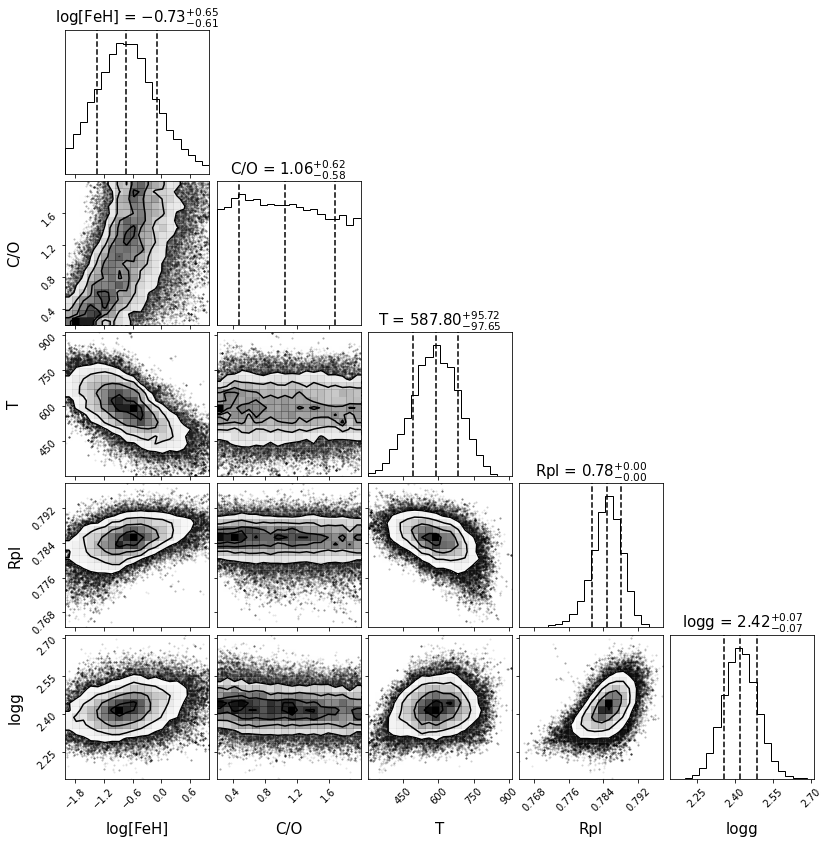

In [48]:
import corner
samples = sampler.flatchain
samples[:,3]=samples[:,3]/nc.r_jup_mean
lab=['log[FeH]','C/O','T','Rpl','logg']
figure=corner.corner(samples,labels=lab,quantiles=[0.16,0.5,0.84],show_titles=True,title_kwargs={"fontsize": 15},label_kwargs={"fontsize": 15})

print (samples)


  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.

[0.00033851 0.00037257 0.00042327 0.00049069 0.00057587 0.000668
 0.00075994 0.00083612 0.00089116 0.00092551 0.00094403 0.00095392
 0.00095851 0.00096087 0.0009619  0.00096243 0.00096265 0.00096276
 0.00096281 0.00096283 0.00096283 0.00096284 0.00096284 0.00096283
 0.00096283 0.00096283 0.00096283 0.00096282 0.00096282 0.00096282
 0.00096281 0.00096281 0.00096281 0.0009628  0.00096279 0.00096279
 0.00096278 0.00096277 0.00096276 0.00096274 0.00096272 0.0009627
 0.00096267 0.00096264 0.00096261 0.00096256 0.00096251 0.00096244
 0.00096236 0.00096227]
[1.00000000e-06 1.45634848e-06 2.12095089e-06 3.08884360e-06
 4.49843267e-06 6.55128557e-06 9.54095476e-06 1.38949549e-05
 2.02358965e-05 2.94705170e-05 4.29193426e-05 6.25055193e-05
 9.10298178e-05 1.32571137e-04 1.93069773e-04 2.81176870e-04
 4.09491506e-04 5.96362332e-04 8.68511374e-04 1.26485522e-03
 1.84206997e-03 2.68269580e-03 3.90693994e-03 5.68986603e-03


NameError: name 'wave' is not defined

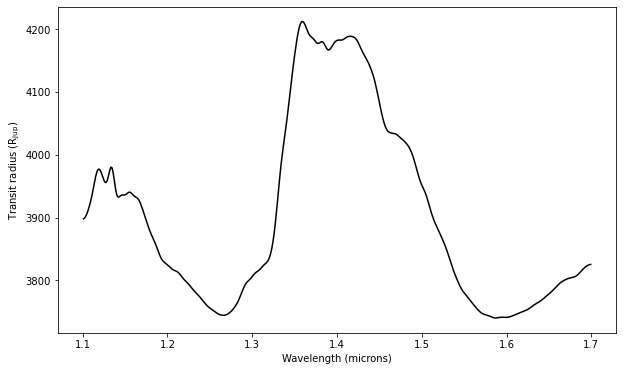

In [18]:
from scipy.ndimage import gaussian_filter as gauss

atmosphere = Radtrans(line_species = ['H2O_HITEMP'],
                                      #'CO_all_iso_HITEMP',
                                     # 'CH4'],
                                     # 'CO2',
                                     # 'Na_allard',
                                     # 'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])

pressures = np.logspace(-6, 2, 50)

atmosphere.setup_opa_structure(pressures)
temperature = 588.75 * np.ones_like(pressures)

COs = 0.55 * np.ones_like(pressures)
FeHs = (-0.73) * np.ones_like(pressures)
#temperature = 700. * np.ones_like(pressures)
mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures)
from petitRADTRANS import nat_cst as nc
#R_pl = 0.77*nc.r_jup_mean
#gravity = 450.0
#P0 = 1.0 # bar
       #     FeHs, \
       #     temperature, \
       #     pressures)
mass_fractions['H2O_HITEMP'] = mass_fractions.pop('H2O')
print (mass_fractions['H2O_HITEMP'])
#print (mass_fractions['CH4'])
print (pressures)
#MMW = 2.33 * np.ones_like(temperature)
MMW=mass_fractions['MMW']
from petitRADTRANS import nat_cst as nc
R_pl = 0.78*nc.r_jup_mean
gravity = 10**2.42
P0 = 1.0 # bar


atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

plt.plot(nc.c/atmosphere.freq/1e-4, gauss((atmosphere.transm_rad/(1.31*nc.r_sun))**2*1e6,3),color='black')

#plt.xscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Transit radius ($\rm R_{Jup}$)')
plt.errorbar(wave,Rad*1e6,yerr=Rad_err*1e6,xerr=wave_err,ls='none',marker='o',color='red')
#plt.show()
#plt.clf()


atmosphere_1 = Radtrans(line_species = ['H2O_HITEMP'],
                                      #'CO_all_iso_HITEMP',
                                     # 'CH4'],
                                     # 'CO2',
                                     # 'Na_allard',
                                     # 'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])

pressures = np.logspace(-6, 2, 50)

atmosphere_1.setup_opa_structure(pressures)

temperature = 680.75 * np.ones_like(pressures)

COs = 0.1 * np.ones_like(pressures)
FeHs = (-0.1) * np.ones_like(pressures)
#temperature = 700. * np.ones_like(pressures)
mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures)
from petitRADTRANS import nat_cst as nc
#R_pl = 0.77*nc.r_jup_mean
#gravity = 450.0
#P0 = 1.0 # bar
       #     FeHs, \
       #     temperature, \
       #     pressures)
mass_fractions['H2O_HITEMP'] = mass_fractions.pop('H2O')

#MMW = 2.33 * np.ones_like(temperature)
MMW=mass_fractions['MMW']
from petitRADTRANS import nat_cst as nc
R_pl = 0.79*nc.r_jup_mean
gravity = 10**2.50
P0 = 1.0 # bar



atmosphere_1.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)




atmosphere_2 = Radtrans(line_species = ['H2O_HITEMP',
                                      #'CO_all_iso_HITEMP',
                                      'CH4'],
                                     # 'CO2',
                                     # 'Na_allard',
                                     # 'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])

pressures = np.logspace(-6, 2, 50)

atmosphere_2.setup_opa_structure(pressures)
temperature = 500.75 * np.ones_like(pressures)

COs = 0.1 * np.ones_like(pressures)
FeHs = (-1.33) * np.ones_like(pressures)
#temperature = 700. * np.ones_like(pressures)
mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures)
from petitRADTRANS import nat_cst as nc
#R_pl = 0.77*nc.r_jup_mean
#gravity = 450.0
#P0 = 1.0 # bar
       #     FeHs, \
       #     temperature, \
       #     pressures)
mass_fractions['H2O_HITEMP'] = mass_fractions.pop('H2O')

#MMW = 2.33 * np.ones_like(temperature)
MMW=mass_fractions['MMW']
from petitRADTRANS import nat_cst as nc
R_pl = 0.77*nc.r_jup_mean
gravity = 10**2.35
P0 = 1.0 # bar

atmosphere_2.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)

#plt.fill_between(nc.c/atmosphere.freq/1e-4, gauss((atmosphere_2.transm_rad/(1.31*nc.r_sun))**2*1e6,3),gauss((atmosphere_1.transm_rad/(1.31*nc.r_sun))**2*1e6,3),color='blue',alpha=0.3)

#  Constraining Kzz and internal temperature

In [87]:
kappa_IR = 0.01
gamma = 0.4
T_int = 100.
T_equ = 670.
gravity=1500

temperature = nc.guillot_global(pressures, kappa_IR, gamma, gravity, T_int, T_equ)


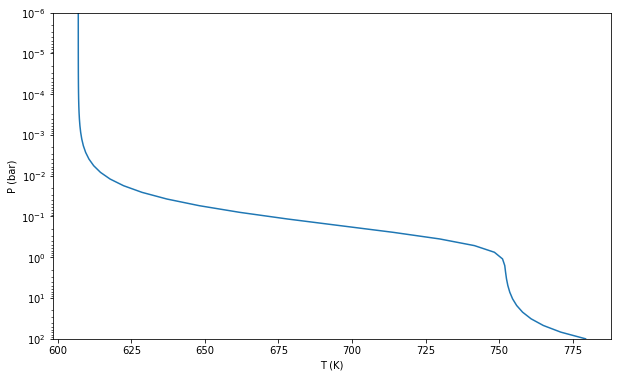

<Figure size 720x432 with 0 Axes>

In [88]:
plt.plot(temperature, pressures)
plt.yscale('log')
plt.ylim([1e2, 1e-6])
plt.xlabel('T (K)')
plt.ylabel('P (bar)')
plt.show()
plt.clf()


In [110]:
def model_petit_eq_tp(R_star,MMW,P0,atmosphere,mass_fractions,temperature,Rpl,gravity,Kzz):
    atmosphere.calc_transm(temperature, mass_fractions, 10**gravity, MMW, R_pl=Rpl, P0_bar=P0,Kzz=Kzz)
    unbinned=nc.c/atmosphere.freq/1e-4
    unbinned_rad=(atmosphere.transm_rad/(R_star))**2
    return unbinned,unbinned_rad


def lnlike_eq_tp(theta,wave,wavebins,Rad,Rad_err,Rstar,P0,kappa,gamma):
#     P,T,R=np.loadtxt('final_temp_pressure_profile.txt',unpack=True)
#     lmb=x
#     print 'theta',theta
 #    print (len(time),len(data_xshift),len(Forward),len(Include))
   # temperature = theta[2] * np.ones_like(pressures)
    COs = theta[1] * np.ones_like(pressures)
    FeHs = theta[0] * np.ones_like(pressures)
    Kzz=(10**theta[2])* np.ones_like(pressures)
#    temperature = theta[2] * np.ones_like(pressures)
    temperature = nc.guillot_global(pressures, kappa, gamma, 10**theta[4], theta[5],theta[6])
    mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures)
    mass_fractions['H2O_HITEMP'] = mass_fractions.pop('H2O')
    MMW=mass_fractions['MMW']
   # mass_fractions = {}
#    mass_fractions['H2'] = 0.74 * np.ones_like(temperature)
#    mass_fractions['He'] = 0.24 * np.ones_like(temperature)
#    mass_fractions['H2O_HITEMP'] = (10**theta[0]) * np.ones_like(temperature)
  #  mass_fractions['CO_all_iso_HITEMP'] = theta[1] * np.ones_like(temperature)
#    mass_fractions['CO2'] = theta[2] * np.ones_like(temperature)
 #   mass_fractions['CH4'] = (10**theta[1]) * np.ones_like(temperature)
 #   mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
 #   mass_fractions['K_allard'] = 0.000001 * np.ones_like(temperature)
    unbinned,unbinned_rad=model_petit_eq_tp(R_star,MMW,P0,atmosphere,mass_fractions,temperature,theta[3],theta[4],Kzz)
    model=rebin(wave,wavebins,unbinned,unbinned_rad)
 #   MMW = 2.33 * np.ones_like(temperature)
    
    chisq=-0.5*sum(((model-Rad)/Rad_err)**2)
#     print chisq
    return chisq

def lnprior_eq_tp(theta):
    theta0=[0.0,0.2,0,0.7*nc.r_jup_mean,1.5,100,500]
    theta1=[3,2.0,11,1.0*nc.r_jup_mean,4.0,400,1200]
    b=True
    for i in range (len(theta)):
        b=b*((theta[i]>theta0[i]) and (theta[i]<theta1[i]))
  #      print (b)
    if (b==1):
        return 0.0
    else:
        return -np.inf
    
def lnprob_eq_tp(theta,wave,wavebins,Rad,Rad_err,R_star,P0,kappa,gamma):
    lp = lnprior_eq_tp(theta)
  #  print (lp)
    if (lp== -np.inf):
        
        return -np.inf
    else:
        return lnlike_eq_tp(theta,wave,wavebins,Rad,Rad_err,R_star,P0,kappa,gamma) 

In [111]:
atmosphere = Radtrans(line_species = ['H2O_HITEMP','CH4'],
                                      
                                      
                                      
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])
pressures = np.logspace(-6, 2, 50)
atmosphere.setup_opa_structure(pressures)

  Read line opacities of CH4...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.



In [112]:
ndim = 7
nwalkers =20
p0=[]
theta_val=[-0.5,0.3,5,0.7*nc.r_jup_mean,2.0,100,600]
theta_err=[0.5,0.7,6,0.8*nc.r_jup_mean,3.0,200,700]
for i in range(nwalkers):
    f=np.array([]) 
  #  temp=[]
    for j in range (ndim):
        f=np.append(f,np.random.uniform(theta_val[j],theta_err[j]))
 #   f4=np.random.uniform(0.0,0.1)
#    f4=np.random.uniform(-0.05,0.05)
#    f=np.array([f0,f1,f2,f3])
    p0.append(f)
print (p0)

[array([-2.12374479e-01,  5.15303575e-01,  5.03679937e+00,  5.11436547e+09,
        2.87440129e+00,  1.18134280e+02,  6.50939964e+02]), array([-3.85091897e-01,  3.58089576e-01,  5.52156008e+00,  5.20217649e+09,
        2.31455485e+00,  1.61307108e+02,  6.98234128e+02]), array([3.16891752e-01, 4.90151693e-01, 5.28663772e+00, 5.37695549e+09,
       2.43049049e+00, 1.71643232e+02, 6.46383399e+02]), array([-1.99881730e-01,  6.93186992e-01,  5.83806608e+00,  5.53632587e+09,
        2.55593552e+00,  1.40140468e+02,  6.74902683e+02]), array([2.98925402e-02, 6.59305265e-01, 5.86824388e+00, 5.37892901e+09,
       2.62273153e+00, 1.86550206e+02, 6.91337662e+02]), array([-3.58672604e-01,  4.74713012e-01,  5.42215128e+00,  5.32845524e+09,
        2.26020851e+00,  1.68898203e+02,  6.75519416e+02]), array([4.80654395e-01, 3.76351257e-01, 5.38720663e+00, 5.31041437e+09,
       2.84677794e+00, 1.00224719e+02, 6.59716223e+02]), array([-1.33980367e-01,  5.27508587e-01,  5.84422641e+00,  5.32685843e+09,


In [113]:
wave,wave_err,Rad,Rad_err=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/v1298_spectra_emcee_new.txt',skiprows=0,unpack=True)
wavebins=np.zeros([len(wave),2])
#dw=(1.65-1.12)/17
dw=0.013969530897124827
for i in range(len(wave)):
    wavebins[i,0]=(wave[i]-wave_err[i])
    wavebins[i,1]=(wave[i]+wave_err[i])
print (Rad,Rad_err)

R_star=1.31*nc.r_sun
P0 = 1.0

[0.00379928 0.00385735 0.00390708 0.00376746 0.00378207 0.00391894
 0.00397141 0.00421263 0.00414561 0.00413582 0.00395006 0.00382897
 0.00391558 0.0037846  0.00376684 0.0037516  0.00379966] [4.70141339e-05 3.88168214e-05 3.93704849e-05 3.86478207e-05
 4.07122117e-05 4.22248752e-05 4.05090578e-05 3.83149366e-05
 3.69194876e-05 3.87352610e-05 3.85542825e-05 4.19667931e-05
 3.52559624e-05 4.38825169e-05 4.78127383e-05 4.90002533e-05
 7.72975860e-05]


In [114]:
import emcee
from multiprocessing import Pool
import time
import os
import multiprocessing as mp
mp.set_start_method('fork',force=True)
#os.environ["OMP_NUM_THREADS"] = "1"
sampler.reset()
kappa=0.01
gamma=0.4
with Pool() as pool:
    print ('Production phase')
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob_eq_tp, args=(wave,wavebins,Rad,Rad_err,R_star,P0,kappa,gamma),pool=pool)
#    print ('2')
    start=time.time()
#import time
#    print (start)
  #  p0, prob0, state0 = sampler.run_mcmc(p0,10000,progress=True)
    pos, prob, state = sampler.run_mcmc(p0,10000,progress=True)
    end=time.time()
    print (end-start)

  0%|          | 0/10000 [00:00<?, ?it/s]

Production phase


/Users/s.baratuva.nl/opt/anaconda3/lib/python3.8/site-packages/emcee-3.0.2-py3.8.egg/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 10000/10000 [25:02<00:00,  6.66it/s]


1502.152116060257


[[-2.12374479e-01  5.15303575e-01  5.03679937e+00 ...  2.87440129e+00
   1.18134280e+02  6.50939964e+02]
 [-3.85091897e-01  3.58089576e-01  5.52156008e+00 ...  2.31455485e+00
   1.61307108e+02  6.98234128e+02]
 [ 9.12061716e-01  5.03753119e-01  5.16725072e+00 ...  2.58050835e+00
   1.74061594e+02  6.20714665e+02]
 ...
 [ 1.68169709e+00  5.96837633e-01  7.70972589e+00 ...  2.54155132e+00
   1.40082944e+02  8.63680023e+02]
 [ 1.51822661e+00  4.54229126e-01  6.06855666e+00 ...  2.60797115e+00
   3.60089748e+02  8.36554551e+02]
 [ 6.69540710e-01  3.41156226e-01  7.82658615e+00 ...  2.76702042e+00
   2.98887036e+02  8.95154580e+02]]


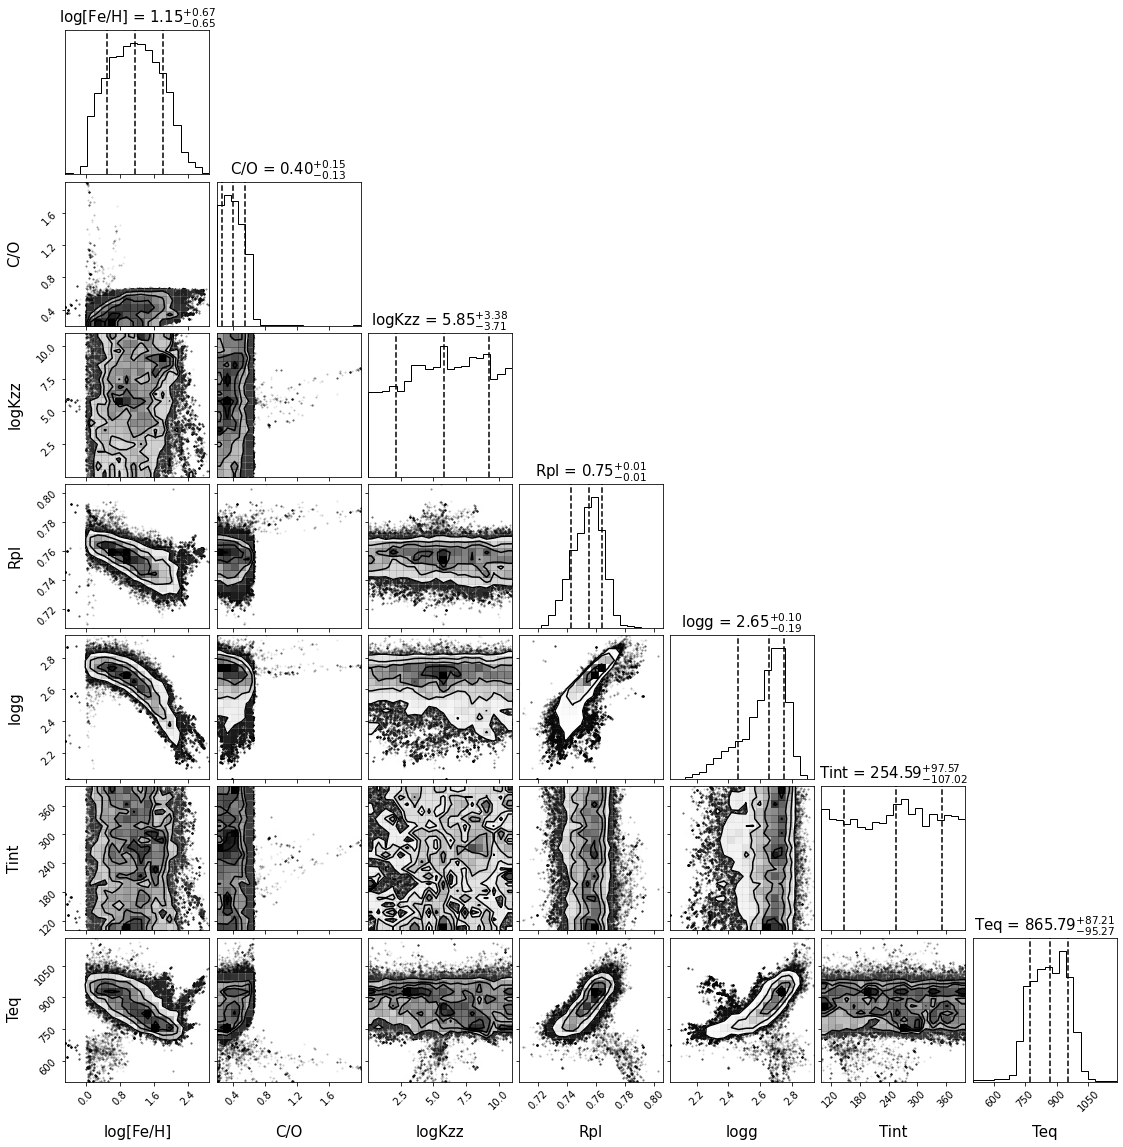

In [115]:
import corner
samples = sampler.flatchain
samples[:,3]=samples[:,3]/nc.r_jup_mean
lab=['log[Fe/H]','C/O','logKzz','Rpl','logg','Tint','Teq']
figure=corner.corner(samples,labels=lab,quantiles=[0.16,0.5,0.84],show_titles=True,title_kwargs={"fontsize": 15},label_kwargs={"fontsize": 15})

print (samples)

# Disequilibrium chemistry with Pquench

In [1]:
import numpy as np
import os
os.environ["pRT_input_data_path"] = "/Users/s.baratuva.nl/Desktop/PhD/input_data"
from petitRADTRANS import Radtrans
from petitRADTRANS import nat_cst as nc
from petitRADTRANS.poor_mans_nonequ_chem import interpol_abundances

In [2]:
atmosphere = Radtrans(line_species = ['H2O_HITEMP','CH4'],
                                      #'CO_all_iso_HITEMP',
                                     # 'CH4'],
                                     # 'CO2',
                                     # 'Na_allard',
                                     # 'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])

pressures = np.logspace(-6, 2, 50)

atmosphere.setup_opa_structure(pressures)

  Read line opacities of CH4...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.



In [99]:
COs = 0.55 * np.ones_like(pressures)
FeHs = 0.0 * np.ones_like(pressures)
temperature = 700 * np.ones_like(pressures)
mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures,Pquench_carbon=10**1)
print (mass_fractions.keys())

dict_keys(['H2', 'He', 'CO', 'H2O', 'HCN', 'C2H2,acetylene', 'CH4', 'PH3', 'CO2', 'NH3', 'H2S', 'VO', 'TiO', 'Na', 'K', 'SiO', 'e-', 'H-', 'H', 'FeH', 'MMW', 'nabla_ad'])


In [4]:
def rebin(wave,wavebins,unbinned,unbinned_rad):
    binned_rad=np.zeros(len(wave))
    for i in range(len(wavebins)):
        x=np.where(unbinned>wavebins[i,0])[0].tolist()
        y=np.where(unbinned<wavebins[i,1])[0].tolist()
#    print (len(x),len(y),wavebins[i,0],wavebins[i,1])
        index=np.intersect1d(x,y)
        binned_rad[i]=np.mean(unbinned_rad[index])
    return binned_rad

In [4]:
def temp_profile(pressures,P_quench,T_up,T_low):
    temperature=T_up*np.ones_like(pressures)
    temperature[np.where(pressures>10**P_quench)[0]]=T_low
    return temperature
    

In [102]:
t=temp_profile(pressures,0.0,600,900)
print (t,pressures)

[600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 600. 600. 600. 900. 900. 900. 900. 900.
 900. 900. 900. 900. 900. 900. 900. 900.] [1.00000000e-06 1.45634848e-06 2.12095089e-06 3.08884360e-06
 4.49843267e-06 6.55128557e-06 9.54095476e-06 1.38949549e-05
 2.02358965e-05 2.94705170e-05 4.29193426e-05 6.25055193e-05
 9.10298178e-05 1.32571137e-04 1.93069773e-04 2.81176870e-04
 4.09491506e-04 5.96362332e-04 8.68511374e-04 1.26485522e-03
 1.84206997e-03 2.68269580e-03 3.90693994e-03 5.68986603e-03
 8.28642773e-03 1.20679264e-02 1.75751062e-02 2.55954792e-02
 3.72759372e-02 5.42867544e-02 7.90604321e-02 1.15139540e-01
 1.67683294e-01 2.44205309e-01 3.55648031e-01 5.17947468e-01
 7.54312006e-01 1.09854114e+00 1.59985872e+00 2.32995181e+00
 3.39322177e+00 4.94171336e+00 7.19685673e+00 1.04811313e+01
 1.52641797e+01 2.22299648e+01 3.23745754e+01 4.71486636e+01
 6.86648845e+

In [7]:
def model_petit_eq_dis(R_star,MMW,P0,atmosphere,mass_fractions,temperature,Rpl,gravity):
    atmosphere.calc_transm(temperature, mass_fractions, 10**gravity, MMW, R_pl=Rpl, P0_bar=P0)
    unbinned=nc.c/atmosphere.freq/1e-4
    unbinned_rad=(atmosphere.transm_rad/(R_star))**2
    return unbinned,unbinned_rad


def lnlike_eq_dis(theta,wave,wavebins,Rad,Rad_err,Rstar,P0):
#     P,T,R=np.loadtxt('final_temp_pressure_profile.txt',unpack=True)
#     lmb=x
#     print 'theta',theta
 #    print (len(time),len(data_xshift),len(Forward),len(Include))
   # temperature = theta[2] * np.ones_like(pressures)
    COs = theta[1] * np.ones_like(pressures)
    FeHs = theta[0] * np.ones_like(pressures)
  #  temperature = theta[2] * np.ones_like(pressures)
    temperature=temp_profile(pressures,theta[5],theta[2],theta[6])
    mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures,Pquench_carbon=10**theta[5])
    mass_fractions['H2O_HITEMP'] = mass_fractions.pop('H2O')
    mass_fractions['CO_all_iso_HITEMP'] = mass_fractions.pop('CO')
    MMW=mass_fractions['MMW']
   # mass_fractions = {}
#    mass_fractions['H2'] = 0.74 * np.ones_like(temperature)
#    mass_fractions['He'] = 0.24 * np.ones_like(temperature)
#    mass_fractions['H2O_HITEMP'] = (10**theta[0]) * np.ones_like(temperature)
  #  mass_fractions['CO_all_iso_HITEMP'] = theta[1] * np.ones_like(temperature)
#    mass_fractions['CO2'] = theta[2] * np.ones_like(temperature)
 #   mass_fractions['CH4'] = (10**theta[1]) * np.ones_like(temperature)
 #   mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
 #   mass_fractions['K_allard'] = 0.000001 * np.ones_like(temperature)
    unbinned,unbinned_rad=model_petit_eq_dis(R_star,MMW,P0,atmosphere,mass_fractions,temperature,theta[3],theta[4])
    model=rebin(wave,wavebins,unbinned,unbinned_rad)
 #   MMW = 2.33 * np.ones_like(temperature)
    
    chisq=-0.5*sum(((model-Rad)/Rad_err)**2)
#     print chisq
    return chisq

def lnprior_eq_dis(theta):
    theta0=[-1.5,0.2,300,0.6*nc.r_jup_mean,1.5,-4,1200]
    theta1=[2.0,1.2,1500,1.0*nc.r_jup_mean,4.0,1,3000]
    b=True
    for i in range (len(theta)):
        b=b*((theta[i]>theta0[i]) and (theta[i]<theta1[i]))
  #      print (b)
    if (b==1):
        return 0.0
    else:
        return -np.inf
    
def lnprob_eq_dis(theta,wave,wavebins,Rad,Rad_err,R_star,P0):
    lp = lnprior_eq_dis(theta)
  #  print (lp)
    if (lp== -np.inf):
        
        return -np.inf
    else:
        return lnlike_eq_dis(theta,wave,wavebins,Rad,Rad_err,R_star,P0) 

In [7]:
ndim = 7
nwalkers =15
p0=[]
theta_val=[-0.5,0.3,600,0.7*nc.r_jup_mean,2,-1.0,1500]
theta_err=[0.5,0.7,700,0.8*nc.r_jup_mean,3,0.0,1600]
for i in range(nwalkers):
    f=np.array([]) 
  #  temp=[]
    for j in range (ndim):
        f=np.append(f,np.random.uniform(theta_val[j],theta_err[j]))
 #   f4=np.random.uniform(0.0,0.1)
#    f4=np.random.uniform(-0.05,0.05)
#    f=np.array([f0,f1,f2,f3])
    p0.append(f)
print (p0)

[array([-1.44897651e-01,  4.23256826e-01,  6.67956781e+02,  4.90566675e+09,
        2.46040388e+00, -5.57749329e-01,  1.55461414e+03]), array([-1.40449835e-01,  4.26848600e-01,  6.06590297e+02,  5.50423155e+09,
        2.11468182e+00, -7.80090542e-01,  1.50487523e+03]), array([ 2.47857427e-01,  4.36971858e-01,  6.55311778e+02,  5.46717457e+09,
        2.39089850e+00, -6.05027450e-01,  1.51911112e+03]), array([ 2.94331411e-01,  5.63616335e-01,  6.32187818e+02,  5.44123174e+09,
        2.43322436e+00, -7.74522934e-01,  1.50850744e+03]), array([-2.81277522e-01,  3.49509814e-01,  6.06463358e+02,  5.02598471e+09,
        2.22730145e+00, -7.15955103e-01,  1.55069433e+03]), array([-4.48612134e-01,  4.46742876e-01,  6.19646528e+02,  5.25744104e+09,
        2.45618638e+00, -1.80066337e-01,  1.51425900e+03]), array([ 2.52272933e-01,  5.98724407e-01,  6.72930479e+02,  5.29336233e+09,
        2.37963562e+00, -6.06688716e-01,  1.59844224e+03]), array([-2.47699332e-01,  5.54317921e-01,  6.07828377e+

In [5]:
wave,wave_err,Rad,Rad_err=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/v1298_spectra_emcee_new.txt',skiprows=0,unpack=True)
wavebins=np.zeros([len(wave),2])
#dw=(1.65-1.12)/17
dw=0.013969530897124827
for i in range(len(wave)):
    wavebins[i,0]=(wave[i]-wave_err[i])
    wavebins[i,1]=(wave[i]+wave_err[i])
print (Rad,Rad_err)

R_star=1.31*nc.r_sun
P0 = 1.0

[0.00379928 0.00385735 0.00390708 0.00376746 0.00378207 0.00391894
 0.00397141 0.00421263 0.00414561 0.00413582 0.00395006 0.00382897
 0.00391558 0.0037846  0.00376684 0.0037516  0.00379966] [4.70141339e-05 3.88168214e-05 3.93704849e-05 3.86478207e-05
 4.07122117e-05 4.22248752e-05 4.05090578e-05 3.83149366e-05
 3.69194876e-05 3.87352610e-05 3.85542825e-05 4.19667931e-05
 3.52559624e-05 4.38825169e-05 4.78127383e-05 4.90002533e-05
 7.72975860e-05]


In [9]:
import emcee
from multiprocessing import Pool
import time
import os
import multiprocessing as mp
mp.set_start_method('fork',force=True)
#os.environ["OMP_NUM_THREADS"] = "1"
with Pool() as pool:
    print ('Burnin phase')
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob_eq_dis, args=(wave,wavebins,Rad,Rad_err,R_star,P0),pool=pool)
#    print ('2')
    start=time.time()
#import time
#    print (start)
    p0, prob0, state0 = sampler.run_mcmc(p0,7000,progress=True)
    end=time.time()
    print (end-start)

  0%|          | 0/7000 [00:00<?, ?it/s]

Burnin phase


100%|██████████| 7000/7000 [14:30<00:00,  8.04it/s]

870.3821198940277


In [13]:
import emcee
from multiprocessing import Pool
import time
import os
import multiprocessing as mp
mp.set_start_method('fork',force=True)
#os.environ["OMP_NUM_THREADS"] = "1"
sampler.reset()
with Pool() as pool:
    print ('Production phase')
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob_eq_dis, args=(wave,wavebins,Rad,Rad_err,R_star,P0),pool=pool)
#    print ('2')
    start=time.time()
#import time
#    print (start)
  #  p0, prob0, state0 = sampler.run_mcmc(p0,10000,progress=True)
    pos, prob, state = sampler.run_mcmc(pos,15000,progress=True)
    end=time.time()
    print (end-start)

  0%|          | 0/15000 [00:00<?, ?it/s]

Production phase


100%|██████████| 15000/15000 [31:05<00:00,  8.04it/s]


1865.8452398777008


In [38]:
x=lnlike_eq_dis(p0[3],wave,wavebins,Rad,Rad_err,1.31*nc.r_sun,P0)

[[ 1.43344166e+00  5.58411307e-01  5.06088363e+02 ...  2.53396629e+00
  -1.82717665e+00  2.25550289e+03]
 [ 4.53120962e-01  6.21528404e-01  4.94699063e+02 ...  2.48905144e+00
  -1.75090047e+00  2.09865635e+03]
 [ 1.68404866e+00  8.02768660e-01  4.34989569e+02 ...  2.35327204e+00
  -1.66230105e+00  2.18927165e+03]
 ...
 [-8.77102670e-03  4.33423096e-01  5.95509009e+02 ...  2.57994967e+00
  -1.31002452e+00  1.80743846e+03]
 [ 1.39949369e+00  6.78836796e-01  4.18205565e+02 ...  2.46671254e+00
  -1.52097622e+00  2.50419426e+03]
 [-7.53936432e-01  4.08050949e-01  4.28631365e+02 ...  2.42964410e+00
  -9.06377983e-01  2.74577855e+03]]


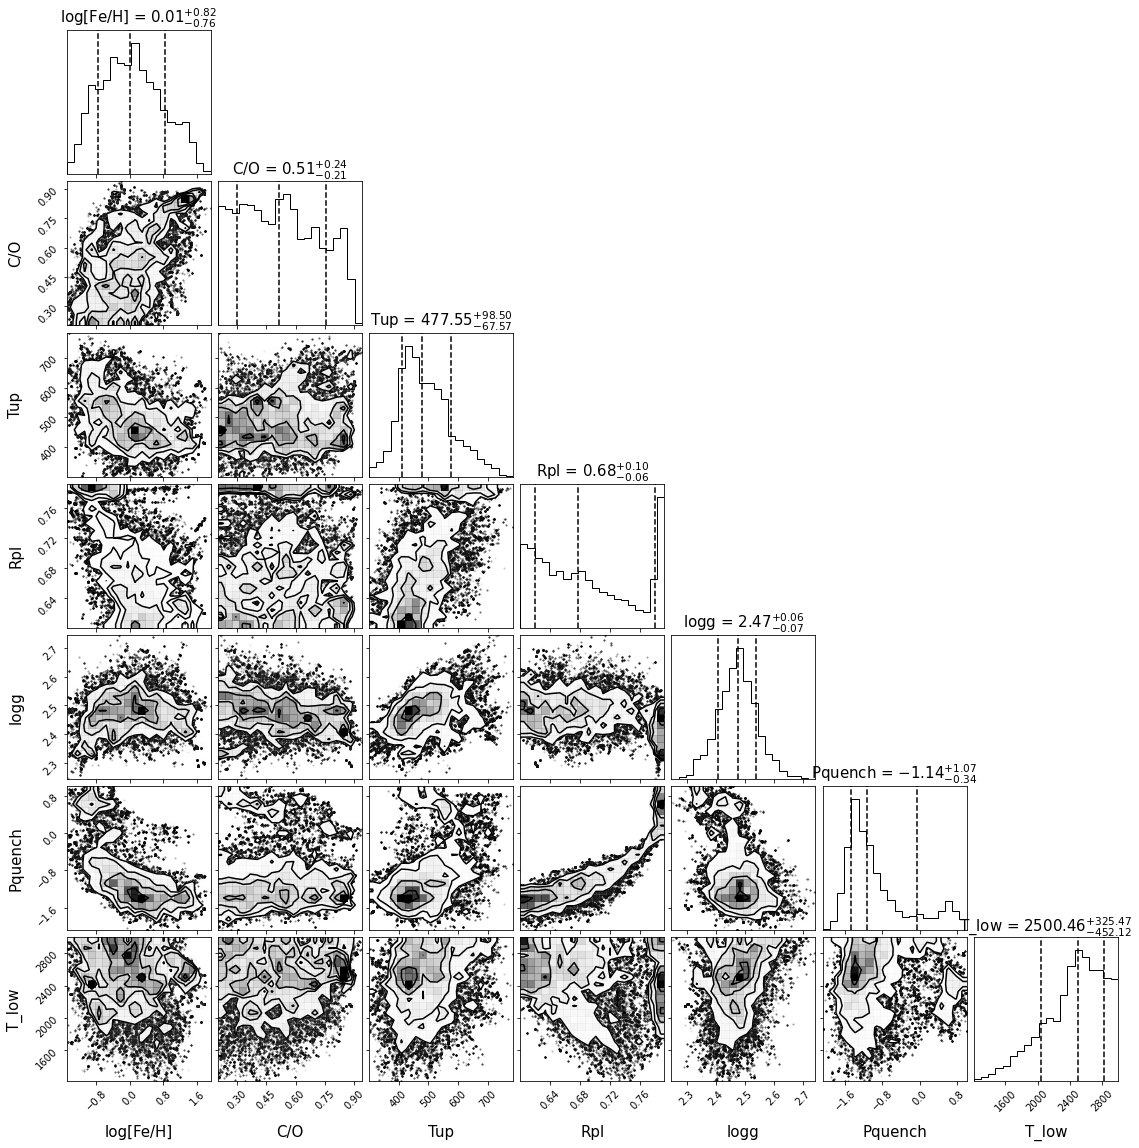

In [14]:
import corner
samples = sampler.flatchain
samples[:,3]=samples[:,3]/nc.r_jup_mean
lab=['log[Fe/H]','C/O','Tup','Rpl','logg','Pquench','T_low']
figure=corner.corner(samples,labels=lab,quantiles=[0.16,0.5,0.84],show_titles=True,title_kwargs={"fontsize": 15},label_kwargs={"fontsize": 15})

print (samples)

  Read line opacities of CH4...
 Done.
  Read line opacities of NH3...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.

[2.32448734 2.32451265 2.32456305 2.32465715 2.32481808 2.32505802
 2.32537331 2.32571657 2.32604372 2.32629563 2.32643997 2.32652013
 2.32656081 2.32658316 2.3265973  2.32660511 2.32660774 2.32660814
 2.32660367 2.3265877  2.32652149 2.32631434 2.32576746 2.32516668
 2.3247488  2.32460077 2.32456939 2.3245587  2.32457164 2.32817845
 2.33185296 2.33106363 2.32758668 2.31987995 2.30599288 2.28596876
 2.26368853 2.24761788 2.24195489 2.24786431 2.25639298 2.26355677
 2.26832587 2.26860993 2.2649903  2.25646062 2.24207528 2.25266473
 2.26758822 2.28019474]


<IPython.core.display.Javascript object>


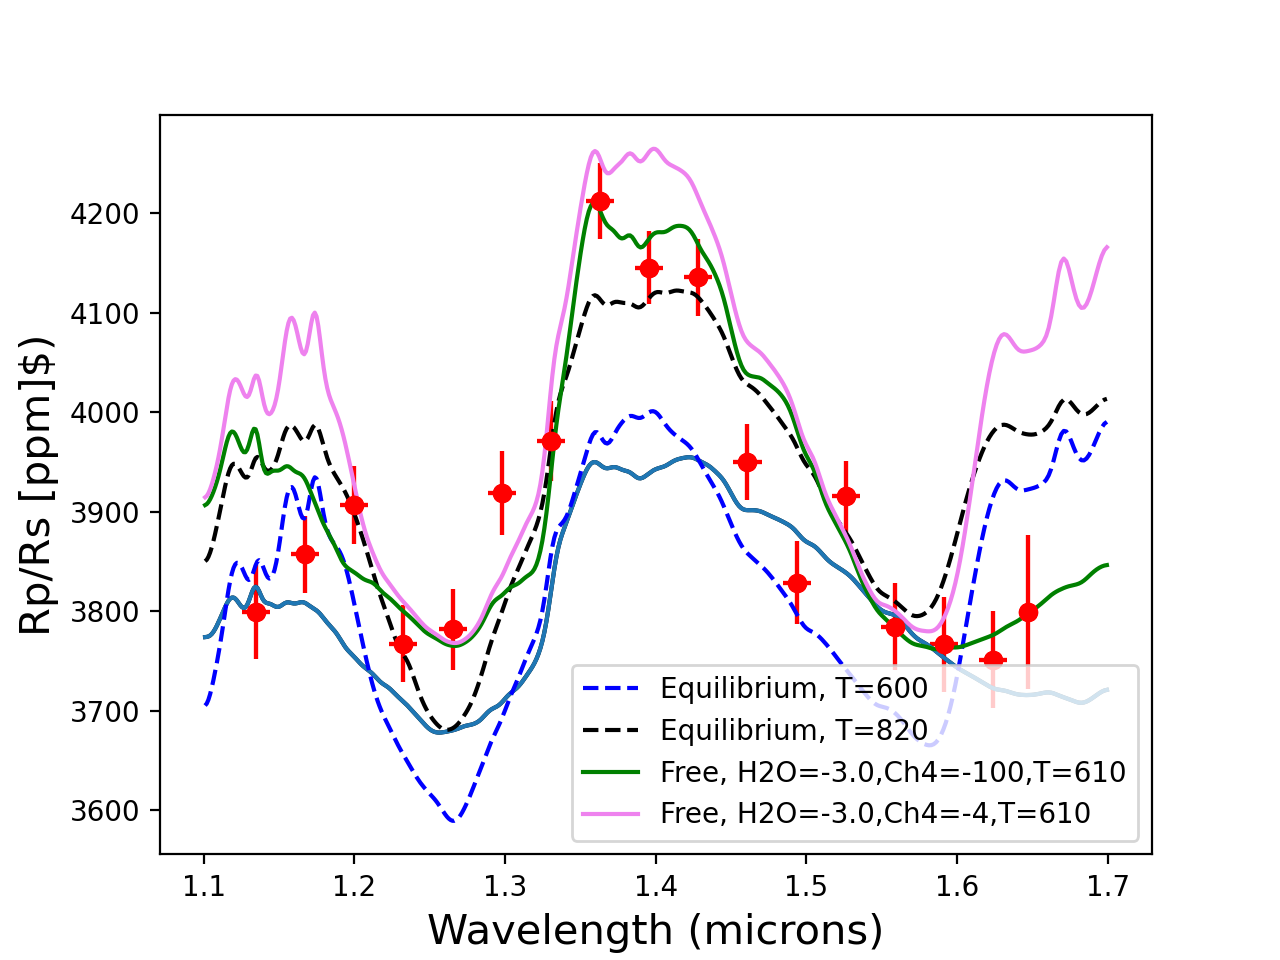

[4.48647188e-08 4.48647188e-08 4.48647188e-08 4.48647188e-08
 4.48647188e-08 4.48647188e-08 4.48647188e-08 4.48647188e-08
 4.48647188e-08 4.48647188e-08 4.48647188e-08 4.48647188e-08
 4.48647188e-08 4.48647188e-08 4.48647188e-08 4.48647188e-08
 4.48647188e-08 4.48647188e-08 4.48647188e-08 4.48647188e-08
 4.48647188e-08 4.48647188e-08 4.48647188e-08 4.48647188e-08
 4.48647188e-08 4.48647188e-08 4.48647188e-08 4.48647188e-08
 4.48647188e-08 4.48647188e-08 4.48647188e-08 4.48647188e-08
 4.48647188e-08 4.48647188e-08 4.19776065e-08 4.58664234e-08
 5.85879598e-08 9.06670157e-08 1.65108630e-07 3.38942092e-07
 7.47643064e-07 1.60214847e-06 3.28342083e-06 6.49965629e-06
 1.17871690e-05 2.00758339e-05 3.25278894e-05 6.73832024e-05
 1.45876159e-04 2.99522962e-04]


In [106]:
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter as gauss

atmosphere = Radtrans(line_species = ['H2O_HITEMP','CH4',
                                      'CO_all_iso_HITEMP','NH3'],
                                     # 'CH4'],
                                     # 'CO2',
                                     # 'Na_allard',
                                     # 'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])

pressures = np.logspace(-6, 3, 50)

atmosphere.setup_opa_structure(pressures)


COs = 0.5 * np.ones_like(pressures)
FeHs = 0.0 * np.ones_like(pressures)
P0=1.0
  #  temperature = theta[2] * np.ones_like(pressures)
kappa_IR = 0.1
gamma = 0.001
T_int = 250.
T_equ = 700.
gravity=10**2.77

temperature = nc.guillot_global(pressures, kappa_IR, gamma, gravity, T_int, T_equ)
#temperature=temp_profile(pressures,-1.0,700,1200)
mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures,Pquench_carbon=10**(0.0))
mass_fractions['H2O_HITEMP'] = mass_fractions.pop('H2O')
mass_fractions['CO_all_iso_HITEMP'] = mass_fractions.pop('CO')
MMW=mass_fractions['MMW']
print (MMW)
   # mass_fractions = {}
#    mass_fractions['H2'] = 0.74 * np.ones_like(temperature)
#    mass_fractions['He'] = 0.24 * np.ones_like(temperature)
#    mass_fractions['H2O_HITEMP'] = (10**theta[0]) * np.ones_like(temperature)
  #  mass_fractions['CO_all_iso_HITEMP'] = theta[1] * np.ones_like(temperature)
#    mass_fractions['CO2'] = theta[2] * np.ones_like(temperature)
 #   mass_fractions['CH4'] = (10**theta[1]) * np.ones_like(temperature)
 #   mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
 #   mass_fractions['K_allard'] = 0.000001 * np.ones_like(temperature)
unbinned,unbinned_rad=model_petit_eq_dis(R_star,MMW,P0,atmosphere,mass_fractions,temperature,0.75*nc.r_jup_mean,2.77)
#print (unbinned)
plt.plot(nc.c/atmosphere.freq/1e-4, gauss((atmosphere.transm_rad/(1.31*nc.r_sun))**2*1e6,3),color='black')
plt.plot(unbinned,gauss(unbinned_rad*1e6,3))
#plt.xscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Transit radius ($\rm R_{Jup}$)')
plt.errorbar(wave,Rad*1e6,yerr=Rad_err*1e6,xerr=wave_err,ls='none',marker='o',color='red')
print (mass_fractions['CH4'])

plt.show()





<IPython.core.display.Javascript object>


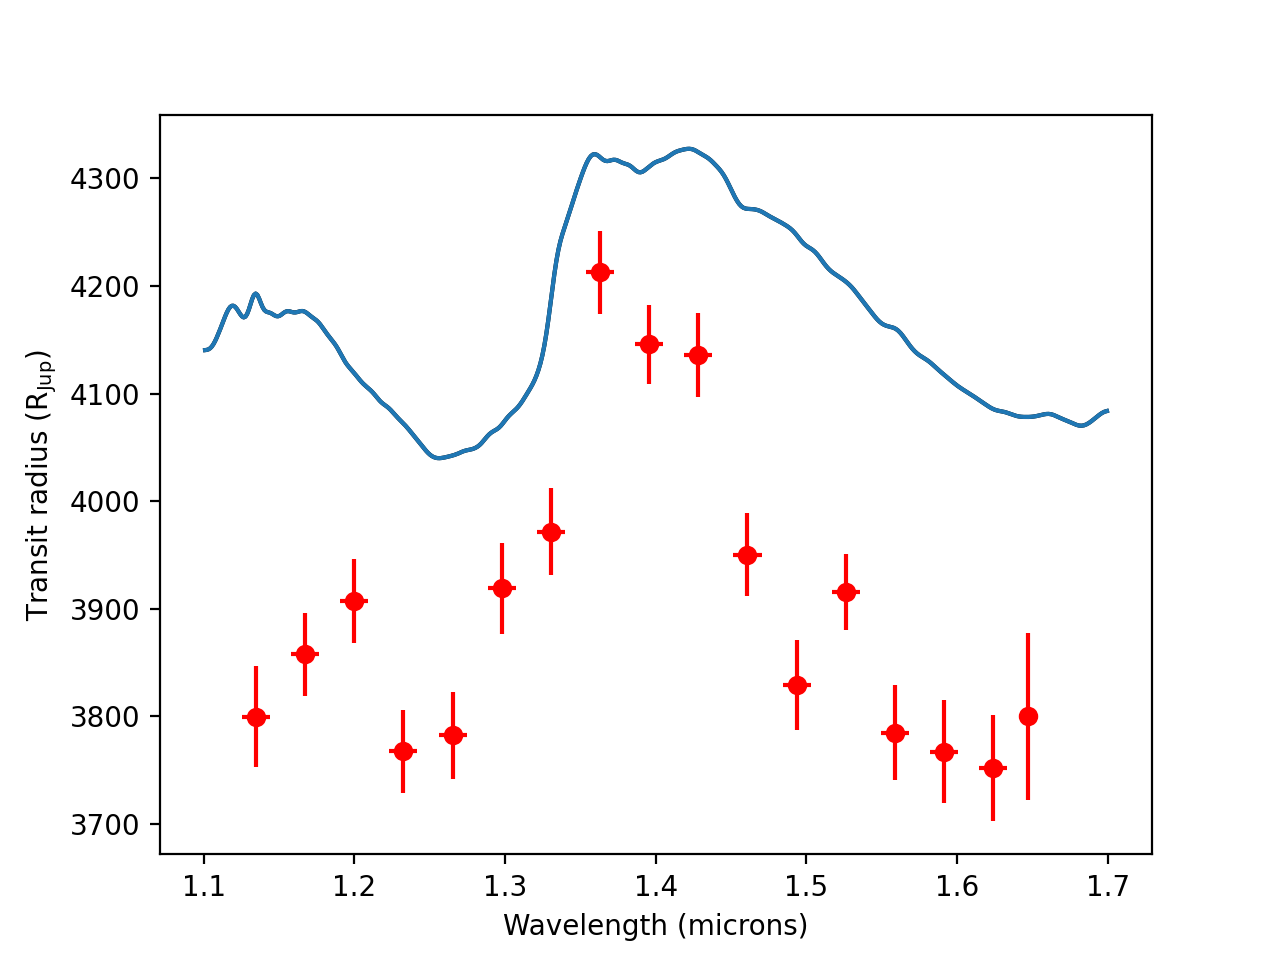

In [100]:
%matplotlib notebook
plt.plot(nc.c/atmosphere.freq/1e-4, gauss((atmosphere.transm_rad/(1.31*nc.r_sun))**2*1e6,3),color='black')
plt.plot(unbinned,gauss(unbinned_rad*1e6,3))
#plt.xscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Transit radius ($\rm R_{Jup}$)')
plt.errorbar(wave,Rad*1e6,yerr=Rad_err*1e6,xerr=wave_err,ls='none',marker='o',color='red')
plt.show()

<IPython.core.display.Javascript object>


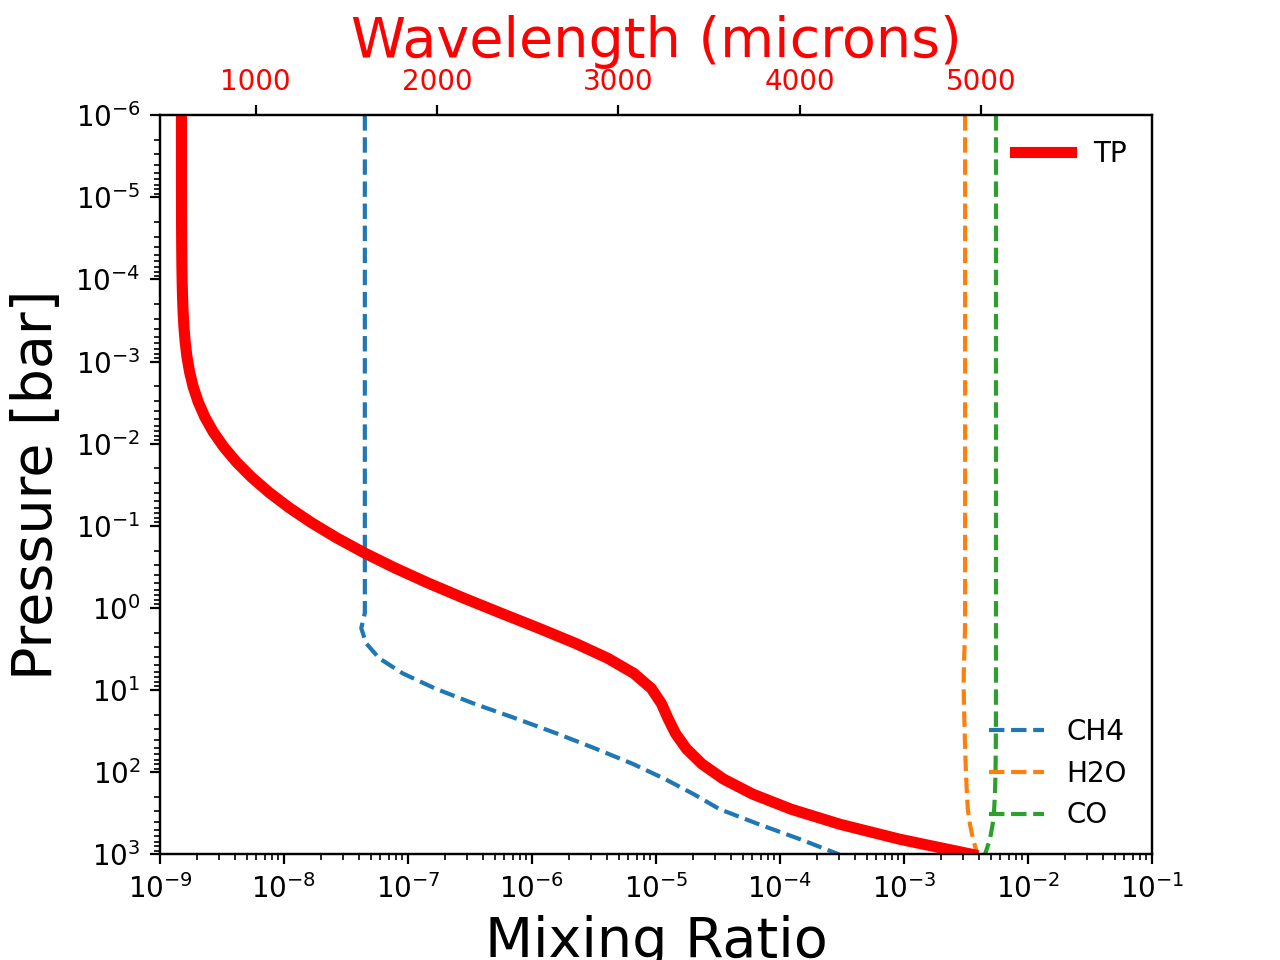

In [93]:
from matplotlib.pyplot import *
from matplotlib.ticker import FormatStrFormatter
%matplotlib notebook

#unpacking variables
#P is in bars
#T is in K
#H2O, CH4,CO,CO2,NH3,Na,K,TiO,VO,C2H2,HCN,H2S,FeH,H2,He are gas mixing ratio profiles
#qc is the condensate abundance profile given an "f_sed" value and cloud base pressure
#r_eff is the effective cloud droplet radius given (see A&M 2001 or Charnay et al. 2017)
#f_r is the mixing ratio array for each of the cloud droplet sizes.
#P,T,mmw, H2O, CH4,CO,CO2,NH3,Na,K,TiO,VO,C2H2,HCN,H2S,FeH,H2,He,H,e, Hm,qc,r_eff,f_r=atm
pressures = np.logspace(-6, 3, 50)

atmosphere.setup_opa_structure(pressures)


COs = 0.5 * np.ones_like(pressures)
FeHs = 0.0 * np.ones_like(pressures)
P0=1.0
  #  temperature = theta[2] * np.ones_like(pressures)
kappa_IR = 0.1
gamma = 0.001
T_int = 250.
T_equ = 700.
gravity=10**2.77

temperature = nc.guillot_global(pressures, kappa_IR, gamma, gravity, T_int, T_equ)
#temperature=temp_profile(pressures,-1.0,700,1200)
mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures,Pquench_carbon=10**(0.0))

fig2, ax1=subplots()
#feel free to plot whatever you want here....
'''
ax1.semilogx(H2O,P,'b',ls='--',lw=2,label='H2O')
ax1.semilogx(CH4,P,'black',ls='--',lw=2,label='CH4')
ax1.semilogx(CO,P,'g',ls='--',lw=2,label='CO')
ax1.semilogx(CO2,P,'orange',ls='--',lw=2,label='CO2')
ax1.semilogx(NH3,P,'darkblue',ls='--',lw=2,label='NH3')
ax1.semilogx(Na,P,'b',lw=2,label='Na')
ax1.semilogx(K,P,'g',lw=2,label='K')
ax1.semilogx(TiO,P,'k',lw=2,label='TiO')
ax1.semilogx(VO,P,'orange',lw=2,label='VO')
ax1.semilogx(qc,P,'gray',lw=1,ls='--',label='Cond. VMR.')  #<---- A&M Cloud Condensate VMR profile (not droplets)
'''
ax1.semilogx(mass_fractions['CH4'],pressures,ls='--',label='CH4')
ax1.semilogx(mass_fractions['H2O'],pressures,ls='--',label='H2O')
ax1.semilogx(mass_fractions['CO'],pressures,ls='--',label='CO')
ax1.set_xlabel('Mixing Ratio',fontsize=20)
ax1.set_ylabel('Pressure [bar]',fontsize=20)
ax1.semilogy()
ax1.legend(loc=4,frameon=False)
#ax1.text(1E-3,1E-4, 'mmw='+str(round(mmw[10],2))+' a.m.u')
ax1.axis([1E-9,1e-1,1e3,1E-6])
#ax1.semilogx()
#plotting TP profile on other x-axis

ax2=ax1.twiny()
ax2.semilogy(temperature,pressures,'r-',lw='4',label='TP')
ax2.set_xlabel('Temperature [K]',color='r',fontsize=20)
ax2.axis([0.8*temperature.min(),1.2*temperature.max(),1e3,1E-6])
for tl in ax2.get_xticklabels(): tl.set_color('r')
ax2.legend(loc=1,frameon=False)


# Overplotting models

  Read line opacities of CH4...
 Done.
  Read line opacities of NH3...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.



<IPython.core.display.Javascript object>


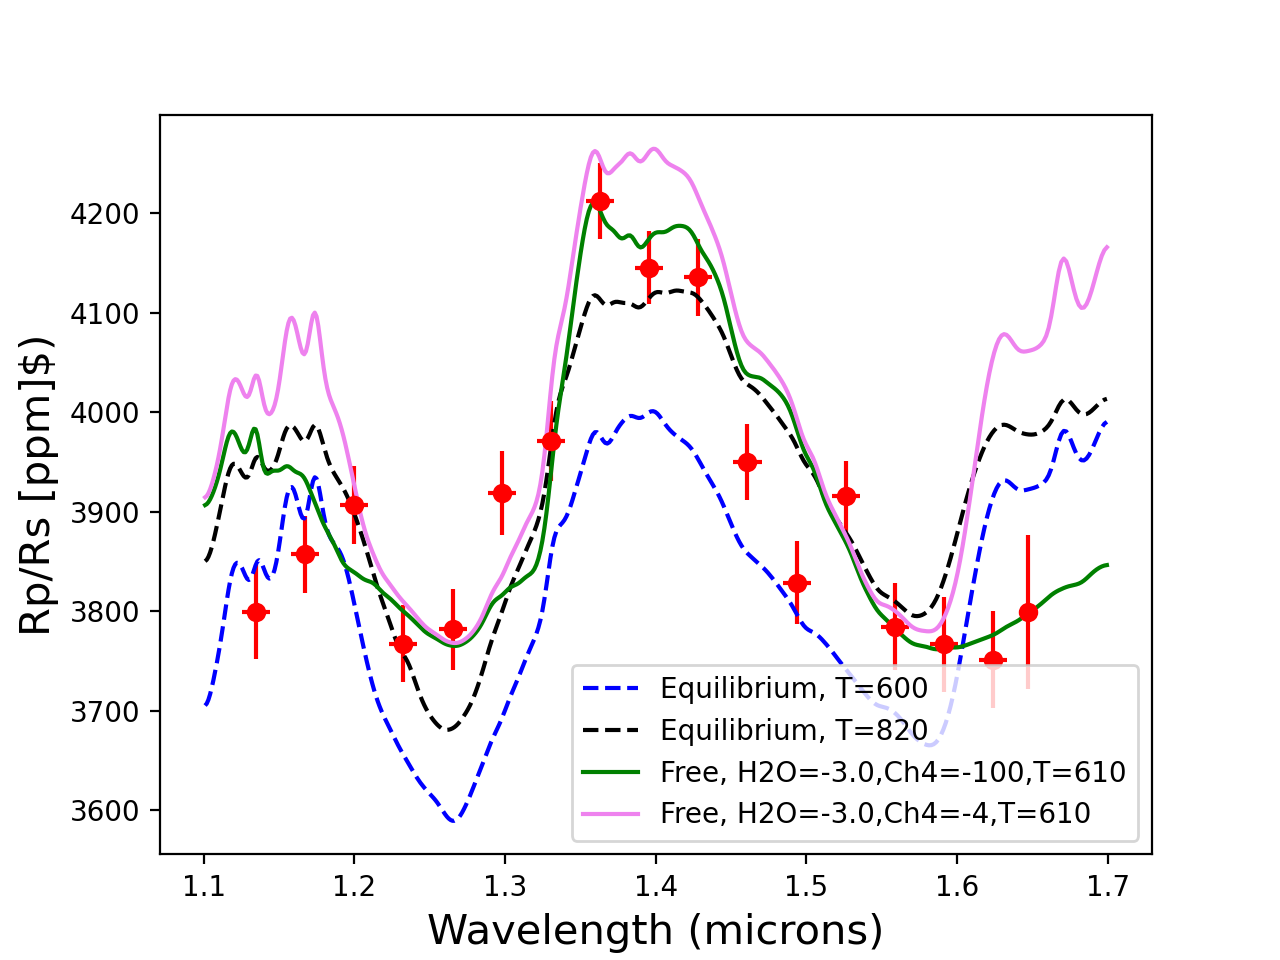

  Read line opacities of CH4...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.



In [111]:
%matplotlib notebook
atmosphere = Radtrans(line_species = ['H2O_HITEMP','CH4','NH3'],
                                      #'CO_all_iso_HITEMP',
                                     # 'CH4'],
                                     # 'CO2',
                                     # 'Na_allard',
                                     # 'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])

pressures = np.logspace(-6, 2, 50)

atmosphere.setup_opa_structure(pressures)


temperature = 600.75 * np.ones_like(pressures)

COs = 0.5 * np.ones_like(pressures)
FeHs = (0.0) * np.ones_like(pressures)
#temperature = 700. * np.ones_like(pressures)
mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures)
from petitRADTRANS import nat_cst as nc
#R_pl = 0.77*nc.r_jup_mean
#gravity = 450.0
#P0 = 1.0 # bar
       #     FeHs, \
       #     temperature, \
       #     pressures)
mass_fractions['H2O_HITEMP'] = mass_fractions.pop('H2O')

#MMW = 2.33 * np.ones_like(temperature)
MMW=mass_fractions['MMW']
from petitRADTRANS import nat_cst as nc
R_pl = 0.76*nc.r_jup_mean
gravity = 10**2.61
P0 = 1.0 # bar


atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)

#import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (10, 6)

plt.plot(nc.c/atmosphere.freq/1e-4, gauss((atmosphere.transm_rad/(1.31*nc.r_sun))**2*1e6,3),color='blue',label='Equilibrium, T=600',ls='--')
#plt.xscale('log')
plt.xlabel('Wavelength (microns)',fontsize=15)
plt.ylabel(r'Rp/Rs [ppm]$)',fontsize=15)
plt.errorbar(wave,Rad*1e6,yerr=Rad_err*1e6,xerr=wave_err,ls='none',marker='o',color='red')


atmosphere = Radtrans(line_species = ['H2O_HITEMP',
                                      #'CO_all_iso_HITEMP',
                                      'CH4'],
                                     # 'CO2',
                                     # 'Na_allard',
                                     # 'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])

pressures = np.logspace(-6, 2, 50)

atmosphere.setup_opa_structure(pressures)
temperature = 815.75 * np.ones_like(pressures)

COs = 0.5 * np.ones_like(pressures)
FeHs = (0.0) * np.ones_like(pressures)
#temperature = 700. * np.ones_like(pressures)
mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures)
from petitRADTRANS import nat_cst as nc
#R_pl = 0.77*nc.r_jup_mean
#gravity = 450.0
#P0 = 1.0 # bar
       #     FeHs, \
       #     temperature, \
       #     pressures)
mass_fractions['H2O_HITEMP'] = mass_fractions.pop('H2O')

#MMW = 2.33 * np.ones_like(temperature)
MMW=mass_fractions['MMW']
from petitRADTRANS import nat_cst as nc
R_pl = 0.76*nc.r_jup_mean
gravity = 10**2.61
P0 = 1.0 # bar


atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)

#import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (10, 6)

plt.plot(nc.c/atmosphere.freq/1e-4, gauss((atmosphere.transm_rad/(1.31*nc.r_sun))**2*1e6,3),color='black',label='Equilibrium, T=820',ls='--')


#plt.plot(unbinned,gauss(unbinned_rad*1e6,3))


temperature = 605.32 * np.ones_like(pressures)

mass_fractions = {}
mass_fractions['H2'] = 0.74 * np.ones_like(temperature)
mass_fractions['He'] = 0.24 * np.ones_like(temperature)
mass_fractions['H2O_HITEMP'] = (10**-3.15) * np.ones_like(temperature)
#mass_fractions['CO_all_iso_HITEMP'] = 0.01 * np.ones_like(temperature)
#mass_fractions['CO2'] = 0.00001 * np.ones_like(temperature)
mass_fractions['CH4'] = (10**(-12)) * np.ones_like(temperature)
mass_fractions['NH3'] = (10**(-1.15)) * np.ones_like(temperature)
#mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
#mass_fractions['K_allard'] = 0.000001 * np.ones_like(temperature)

MMW = 2.33 * np.ones_like(temperature)

from petitRADTRANS import nat_cst as nc
R_pl = 0.84*nc.r_jup_mean
gravity = 10**2.37
P0 = 0.01 # bar


atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)

plt.plot(nc.c/atmosphere.freq/1e-4, gauss((atmosphere.transm_rad/(1.31*nc.r_sun))**2*1e6,3),color='green',ls='-',label='Free, H2O=-3.0,Ch4=-100,T=610')



mass_fractions['CH4'] = (10**(-4)) * np.ones_like(temperature)
#mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
#mass_fractions['K_allard'] = 0.000001 * np.ones_like(temperature)

MMW = 2.33 * np.ones_like(temperature)

from petitRADTRANS import nat_cst as nc
R_pl = 0.84*nc.r_jup_mean
gravity = 10**2.37
P0 = 0.01 # bar


atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)

plt.plot(nc.c/atmosphere.freq/1e-4, gauss((atmosphere.transm_rad/(1.31*nc.r_sun))**2*1e6,3),color='violet',ls='-',label='Free, H2O=-3.0,Ch4=-4,T=610')

plt.legend(loc='best')

# Free retrieval with clouds

In [81]:
import numpy as np
import os
os.environ["pRT_input_data_path"] = "/Users/s.baratuva.nl/Desktop/PhD/input_data"
from petitRADTRANS import Radtrans


In [86]:
atmosphere = Radtrans(line_species = ['H2O_HITEMP',
                                      #'CO_all_iso_HITEMP',
                                      'CH4'],
                                     # 'CO2',
                                     # 'Na_allard',
                                     # 'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [1.1, 1.7])

  Read line opacities of CH4...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
 Done.



In [87]:
pressures = np.logspace(-6, 2, 50)
print (pressures)

[1.00000000e-06 1.45634848e-06 2.12095089e-06 3.08884360e-06
 4.49843267e-06 6.55128557e-06 9.54095476e-06 1.38949549e-05
 2.02358965e-05 2.94705170e-05 4.29193426e-05 6.25055193e-05
 9.10298178e-05 1.32571137e-04 1.93069773e-04 2.81176870e-04
 4.09491506e-04 5.96362332e-04 8.68511374e-04 1.26485522e-03
 1.84206997e-03 2.68269580e-03 3.90693994e-03 5.68986603e-03
 8.28642773e-03 1.20679264e-02 1.75751062e-02 2.55954792e-02
 3.72759372e-02 5.42867544e-02 7.90604321e-02 1.15139540e-01
 1.67683294e-01 2.44205309e-01 3.55648031e-01 5.17947468e-01
 7.54312006e-01 1.09854114e+00 1.59985872e+00 2.32995181e+00
 3.39322177e+00 4.94171336e+00 7.19685673e+00 1.04811313e+01
 1.52641797e+01 2.22299648e+01 3.23745754e+01 4.71486636e+01
 6.86648845e+01 1.00000000e+02]


In [88]:
atmosphere.setup_opa_structure(pressures)

In [89]:
import numpy as np
wave,wave_err,Rad,Rad_err=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/v1298_spectra_emcee_new.txt',skiprows=0,unpack=True)

In [90]:
def rebin(wave,wavebins,unbinned,unbinned_rad):
    binned_rad=np.zeros(len(wave))
    for i in range(len(wavebins)):
        x=np.where(unbinned>wavebins[i,0])[0].tolist()
        y=np.where(unbinned<wavebins[i,1])[0].tolist()
#    print (len(x),len(y),wavebins[i,0],wavebins[i,1])
        index=np.intersect1d(x,y)
        binned_rad[i]=np.mean(unbinned_rad[index])
    return binned_rad

In [131]:
def model_petit(R_star,MMW,P0,atmosphere,mass_fractions,temperature,Rpl,gravity,Pcloud):
    atmosphere.calc_transm(temperature, mass_fractions, 10**gravity, MMW, R_pl=Rpl, P0_bar=P0,Pcloud=10**Pcloud)
    unbinned=nc.c/atmosphere.freq/1e-4
    unbinned_rad=(atmosphere.transm_rad/(1.31*nc.r_sun))**2
    return unbinned,unbinned_rad


def lnlike(theta,wave,wavebins,Rad,Rad_err,Rstar,MMW,P0):
#     P,T,R=np.loadtxt('final_temp_pressure_profile.txt',unpack=True)
#     lmb=x
#     print 'theta',theta
 #    print (len(time),len(data_xshift),len(Forward),len(Include))
    temperature = theta[2] * np.ones_like(pressures)

    mass_fractions = {}
    mass_fractions['H2'] = 0.74 * np.ones_like(temperature)
    mass_fractions['He'] = 0.24 * np.ones_like(temperature)
    mass_fractions['H2O_HITEMP'] = (10**theta[0]) * np.ones_like(temperature)
  #  mass_fractions['CO_all_iso_HITEMP'] = theta[1] * np.ones_like(temperature)
#    mass_fractions['CO2'] = theta[2] * np.ones_like(temperature)
    mass_fractions['CH4'] = (10**theta[1]) * np.ones_like(temperature)
 #   mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
 #   mass_fractions['K_allard'] = 0.000001 * np.ones_like(temperature)
    unbinned,unbinned_rad=model_petit(R_star,MMW,P0,atmosphere,mass_fractions,temperature,theta[3],theta[4],theta[5])
    model=rebin(wave,wavebins,unbinned,unbinned_rad)
 #   MMW = 2.33 * np.ones_like(temperature)
    
    chisq=-0.5*sum(((model-Rad)/Rad_err)**2)
#     print chisq
    return chisq

def lnprior(theta):
    theta0=[-7,-8,300,0.5*nc.r_jup_mean,1.0,-4]
    theta1=[-1,-3,1500,1.0*nc.r_jup_mean,4.0,2]
    b=True
    for i in range (len(theta)):
        b=b*((theta[i]>theta0[i]) and (theta[i]<theta1[i]))
  #      print (b)
    if (b==1):
        return 0.0
    else:
        return -np.inf
    
def lnprob(theta,wave,wavebins,Rad,Rad_err,R_star,MMW,P0):
    lp = lnprior(theta)
  #  print (lp)
    if (lp== -np.inf):
        
        return -np.inf
    else:
        return lnlike(theta,wave,wavebins,Rad,Rad_err,R_star,MMW,P0) 

In [132]:
ndim = 6
nwalkers =15
p0=[]
theta_val=[-3,-5,600,0.75*nc.r_jup_mean,2.0,-2]
theta_err=[-2,-6,700,0.8*nc.r_jup_mean,3.0,-1]
for i in range(nwalkers):
    f=np.array([]) 
  #  temp=[]
    for j in range (ndim):
        f=np.append(f,np.random.uniform(theta_val[j],theta_err[j]))
 #   f4=np.random.uniform(0.0,0.1)
#    f4=np.random.uniform(-0.05,0.05)
#    f=np.array([f0,f1,f2,f3])
    p0.append(f)
#print (p0)    

In [133]:
wave,wave_err,Rad,Rad_err=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/v1298_spectra_emcee_new.txt',skiprows=0,unpack=True)
wavebins=np.zeros([len(wave),2])
#dw=(1.65-1.12)/17
dw=0.013969530897124827
for i in range(len(wave)):
    wavebins[i,0]=(wave[i]-wave_err[i])
    wavebins[i,1]=(wave[i]+wave_err[i])
print (Rad,Rad_err)

R_star=1.31*nc.r_sun
P0 = 1.0
MMW = 2.33 * np.ones_like(pressures)

[0.00379928 0.00385735 0.00390708 0.00376746 0.00378207 0.00391894
 0.00397141 0.00421263 0.00414561 0.00413582 0.00395006 0.00382897
 0.00391558 0.0037846  0.00376684 0.0037516  0.00379966] [4.70141339e-05 3.88168214e-05 3.93704849e-05 3.86478207e-05
 4.07122117e-05 4.22248752e-05 4.05090578e-05 3.83149366e-05
 3.69194876e-05 3.87352610e-05 3.85542825e-05 4.19667931e-05
 3.52559624e-05 4.38825169e-05 4.78127383e-05 4.90002533e-05
 7.72975860e-05]


In [134]:
import emcee
from multiprocessing import Pool
import time
import os
import multiprocessing as mp
mp.set_start_method('fork',force=True)
#os.environ["OMP_NUM_THREADS"] = "1"
with Pool() as pool:
    print ('Burnin phase')
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(wave,wavebins,Rad,Rad_err,R_star,MMW,P0),pool=pool)
#    print ('2')
    start=time.time()
#import time
#    print (start)
    p0, prob0, state0 = sampler.run_mcmc(p0,5000,progress=True)
    end=time.time()
    print (end-start)

  0%|          | 0/5000 [00:00<?, ?it/s]

Burnin phase


100%|██████████| 5000/5000 [11:19<00:00,  7.35it/s]


680.1870911121368


In [140]:
import emcee
from multiprocessing import Pool
import time
import os
import multiprocessing as mp
mp.set_start_method('fork',force=True)
#os.environ["OMP_NUM_THREADS"] = "1"
sampler.reset()
with Pool() as pool:
    print ('Production phase')
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(wave,wavebins,Rad,Rad_err,R_star,MMW,P0),pool=pool)
#    print ('2')
    start=time.time()
#import time
#    print (start)
  #  p0, prob0, state0 = sampler.run_mcmc(p0,10000,progress=True)
    pos, prob, state = sampler.run_mcmc(pos,20000,progress=True)
    end=time.time()
    print (end-start)

  0%|          | 0/20000 [00:00<?, ?it/s]

Production phase


100%|██████████| 20000/20000 [41:26<00:00,  8.04it/s]


2486.2548558712006


[[-5.56475223e+00 -6.42942353e+00  1.06472024e+03  6.80544960e-01
   2.12016448e+00 -9.75583938e-01]
 [-2.52876583e+00 -6.92920222e+00  8.47016818e+02  6.15559389e-01
   2.34196274e+00 -3.16810429e+00]
 [-4.19163695e+00 -7.08362707e+00  9.28717141e+02  5.03322019e-01
   2.21802916e+00 -2.75252741e+00]
 ...
 [-2.21777490e+00 -5.87659165e+00  5.45063227e+02  6.65365579e-01
   2.18826267e+00 -2.63639504e+00]
 [-2.83716455e+00 -5.02657929e+00  5.74488585e+02  6.62120143e-01
   2.18506576e+00 -2.70033422e+00]
 [-3.54910306e+00 -6.50909560e+00  6.88073235e+02  5.48219242e-01
   2.14172669e+00 -2.96877445e+00]]


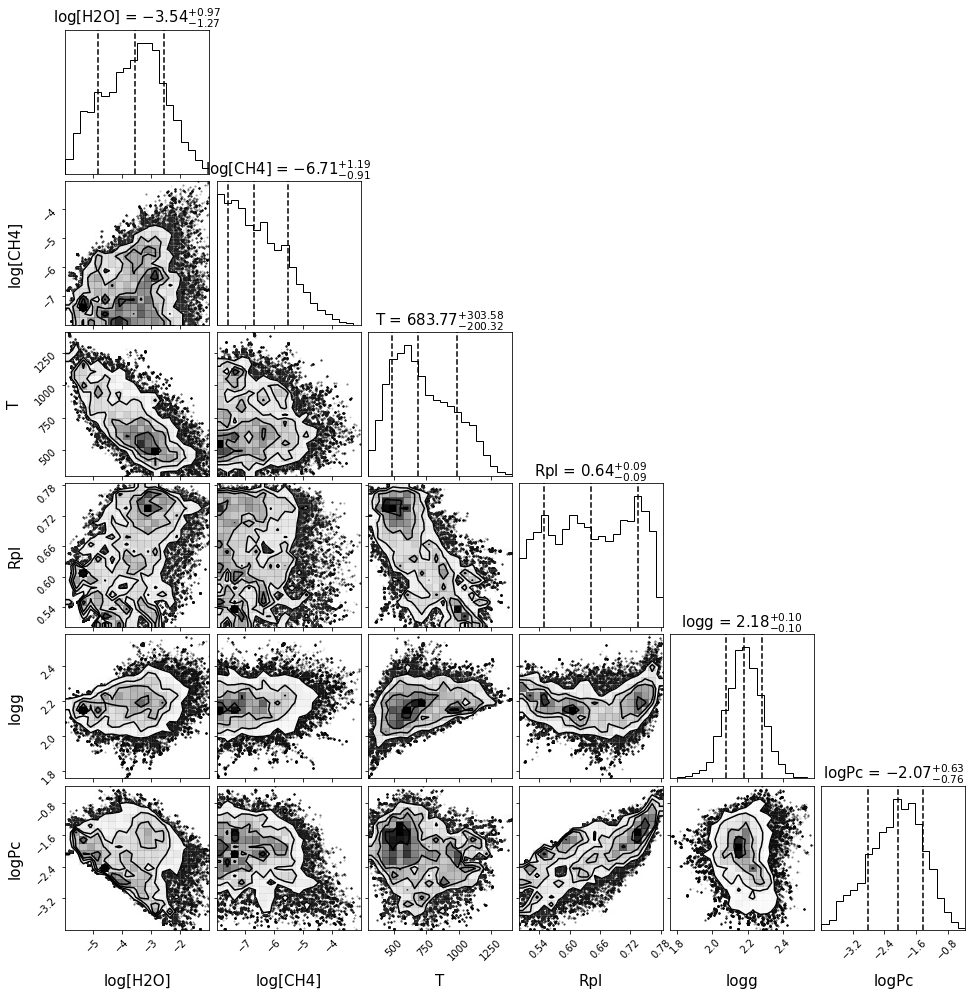

In [141]:
import corner
samples = sampler.flatchain
samples[:,3]=samples[:,3]/nc.r_jup_mean
lab=['log[H2O]','log[CH4]','T','Rpl','logg','logPc']
figure=corner.corner(samples,labels=lab,quantiles=[0.16,0.5,0.84],show_titles=True,title_kwargs={"fontsize": 15},label_kwargs={"fontsize": 15})

print (samples)

In [142]:
samples1=samples[5000:]
theta=[]
for i in range(6):
    q=np.quantile(samples1[:,i],[0.16,0.5,0.84])
    print (q[1],q[0],q[2])
    theta.append(q[1])
#import pickle 
#with open("/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/v1298_b_platon_retrieval_hst_only_rp_free_result.pkl", "wb") as f:
#    pickle.dump(result, f)
#print (min(samples1[:,1]),max(samples1[:,1]))

-3.5345408334771466 -4.810985258348394 -2.5699560874776024
-6.717868790645214 -7.626627802596649 -5.515137297825565
681.7309620594699 483.7108365333753 984.3851469964109
0.6422467114689266 0.5492499975768721 0.7356391312283708
2.179350601639966 2.0774327668489403 2.280974582095043
-2.0587688915658795 -2.8287731622949637 -1.4299240129149458


2.615205646919046


<ErrorbarContainer object of 3 artists>

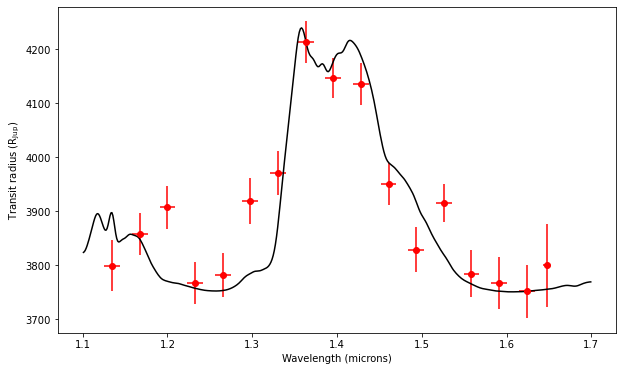

In [26]:
from scipy.ndimage import gaussian_filter as gauss
temperature = 681.73 * np.ones_like(pressures)

mass_fractions = {}
mass_fractions['H2'] = 0.74 * np.ones_like(temperature)
mass_fractions['He'] = 0.24 * np.ones_like(temperature)
mass_fractions['H2O_HITEMP'] = (10**-3.334) * np.ones_like(temperature)
#mass_fractions['CO_all_iso_HITEMP'] = 0.01 * np.ones_like(temperature)
#mass_fractions['CO2'] = 0.00001 * np.ones_like(temperature)
mass_fractions['CH4'] = (10**(-6.717)) * np.ones_like(temperature)
#mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
#mass_fractions['K_allard'] = 0.000001 * np.ones_like(temperature)

MMW = 2.33 * np.ones_like(temperature)

from petitRADTRANS import nat_cst as nc
R_pl = 0.67*nc.r_jup_mean
gravity = 10**2.179
P0 = 1.0 # bar
Pcloud=10**(-2.058)

atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0,Pcloud=Pcloud)
rad_binned=rebin(wave,wavebins,nc.c/atmosphere.freq/1e-4,(atmosphere.transm_rad/(1.31*nc.r_sun))**2)
print (sum(((rad_binned-Rad)/Rad_err)**2)/(len(Rad)))
#print (((rad_binned-Rad)/Rad_err)**2)
#plt.errorbar(wave,rad_binned*1e6,yerr=Rad_err*1e6,ls='none',marker='o')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

plt.plot(nc.c/atmosphere.freq/1e-4, gauss((atmosphere.transm_rad/(1.31*nc.r_sun))**2*1e6,3),color='black')

#plt.xscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Transit radius ($\rm R_{Jup}$)')
plt.errorbar(wave,Rad*1e6,yerr=Rad_err*1e6,xerr=wave_err,ls='none',marker='o',color='red')

# Equilibrium retrieval with clouds

In [162]:
import numpy as np
import os
os.environ["pRT_input_data_path"] = "/Users/s.baratuva.nl/Desktop/PhD/input_data"
from petitRADTRANS import Radtrans


In [163]:
def rebin(wave,wavebins,unbinned,unbinned_rad):
    binned_rad=np.zeros(len(wave))
    for i in range(len(wavebins)):
        x=np.where(unbinned>wavebins[i,0])[0].tolist()
        y=np.where(unbinned<wavebins[i,1])[0].tolist()
#    print (len(x),len(y),wavebins[i,0],wavebins[i,1])
        index=np.intersect1d(x,y)
        binned_rad[i]=np.mean(unbinned_rad[index])
    return binned_rad

In [164]:
def model_petit_eq(R_star,MMW,P0,atmosphere,mass_fractions,temperature,Rpl,gravity,Pcloud):
    atmosphere.calc_transm(temperature, mass_fractions, 10**gravity, MMW, R_pl=Rpl, P0_bar=P0,Pcloud=10**Pcloud)
    unbinned=nc.c/atmosphere.freq/1e-4
    unbinned_rad=(atmosphere.transm_rad/(R_star))**2
    return unbinned,unbinned_rad


def lnlike_eq(theta,wave,wavebins,Rad,Rad_err,Rstar,P0):
#     P,T,R=np.loadtxt('final_temp_pressure_profile.txt',unpack=True)
#     lmb=x
#     print 'theta',theta
 #    print (len(time),len(data_xshift),len(Forward),len(Include))
   # temperature = theta[2] * np.ones_like(pressures)
    COs = theta[1] * np.ones_like(pressures)
    FeHs = theta[0] * np.ones_like(pressures)
    temperature = theta[2] * np.ones_like(pressures)
    mass_fractions = interpol_abundances(COs,FeHs,temperature,pressures)
    mass_fractions['H2O_HITEMP'] = mass_fractions.pop('H2O')
    MMW=mass_fractions['MMW']
   # mass_fractions = {}
#    mass_fractions['H2'] = 0.74 * np.ones_like(temperature)
#    mass_fractions['He'] = 0.24 * np.ones_like(temperature)
#    mass_fractions['H2O_HITEMP'] = (10**theta[0]) * np.ones_like(temperature)
  #  mass_fractions['CO_all_iso_HITEMP'] = theta[1] * np.ones_like(temperature)
#    mass_fractions['CO2'] = theta[2] * np.ones_like(temperature)
 #   mass_fractions['CH4'] = (10**theta[1]) * np.ones_like(temperature)
 #   mass_fractions['Na_allard'] = 0.00001 * np.ones_like(temperature)
 #   mass_fractions['K_allard'] = 0.000001 * np.ones_like(temperature)
    unbinned,unbinned_rad=model_petit_eq(R_star,MMW,P0,atmosphere,mass_fractions,temperature,theta[3],theta[4],theta[5])
    model=rebin(wave,wavebins,unbinned,unbinned_rad)
 #   MMW = 2.33 * np.ones_like(temperature)
    
    chisq=-0.5*sum(((model-Rad)/Rad_err)**2)
#     print chisq
    return chisq

def lnprior_eq(theta):
    theta0=[-2.0,0.2,300,0.5*nc.r_jup_mean,1.5,-4]
    theta1=[1,2.0,1500,1.0*nc.r_jup_mean,4.0,2]
    b=True
    for i in range (len(theta)):
        b=b*((theta[i]>theta0[i]) and (theta[i]<theta1[i]))
  #      print (b)
    if (b==1):
        return 0.0
    else:
        return -np.inf
    
def lnprob_eq(theta,wave,wavebins,Rad,Rad_err,R_star,P0):
    lp = lnprior_eq(theta)
  #  print (lp)
    if (lp== -np.inf):
        
        return -np.inf
    else:
        return lnlike_eq(theta,wave,wavebins,Rad,Rad_err,R_star,P0) 

In [165]:
ndim = 6
nwalkers =15
p0=[]
theta_val=[-0.5,0.3,600,0.7*nc.r_jup_mean,2.0,-1.0]
theta_err=[0.5,0.7,700,0.8*nc.r_jup_mean,3.0,-2.0]
for i in range(nwalkers):
    f=np.array([]) 
  #  temp=[]
    for j in range (ndim):
        f=np.append(f,np.random.uniform(theta_val[j],theta_err[j]))
 #   f4=np.random.uniform(0.0,0.1)
#    f4=np.random.uniform(-0.05,0.05)
#    f=np.array([f0,f1,f2,f3])
    p0.append(f)
print (p0)

[array([-4.89862059e-01,  5.39143051e-01,  6.22276852e+02,  5.11410630e+09,
        2.71949002e+00, -1.93917778e+00]), array([ 5.97353043e-02,  5.00705777e-01,  6.97855297e+02,  5.00918012e+09,
        2.31344443e+00, -1.51084654e+00]), array([-2.21074535e-01,  3.29180961e-01,  6.57347591e+02,  5.00546174e+09,
        2.65410023e+00, -1.72980628e+00]), array([ 4.50959313e-01,  5.20490633e-01,  6.17550272e+02,  5.18480647e+09,
        2.95927817e+00, -1.73872336e+00]), array([-9.12905873e-02,  5.80176192e-01,  6.98370787e+02,  5.03608997e+09,
        2.68454910e+00, -1.01183050e+00]), array([-3.38451956e-02,  5.72362658e-01,  6.08949735e+02,  5.56998168e+09,
        2.55287090e+00, -1.53951114e+00]), array([ 1.49835893e-01,  3.26448608e-01,  6.66196976e+02,  4.93274016e+09,
        2.90087285e+00, -1.69557106e+00]), array([ 2.18400620e-01,  3.63272058e-01,  6.60406504e+02,  5.57307402e+09,
        2.42417652e+00, -1.14356350e+00]), array([ 1.47663914e-01,  4.50590120e-01,  6.74309620e+0

In [166]:
wave,wave_err,Rad,Rad_err=np.loadtxt('/Users/s.baratuva.nl/Desktop/PhD/hst_data_analysis/v1298_taub/output/v1298_spectra_emcee_new.txt',skiprows=0,unpack=True)
wavebins=np.zeros([len(wave),2])
#dw=(1.65-1.12)/17
dw=0.013969530897124827
for i in range(len(wave)):
    wavebins[i,0]=(wave[i]-wave_err[i])
    wavebins[i,1]=(wave[i]+wave_err[i])
print (Rad,Rad_err)

R_star=1.31*nc.r_sun
P0 = 1.0
MMW = 2.33 * np.ones_like(pressures)

[0.00379928 0.00385735 0.00390708 0.00376746 0.00378207 0.00391894
 0.00397141 0.00421263 0.00414561 0.00413582 0.00395006 0.00382897
 0.00391558 0.0037846  0.00376684 0.0037516  0.00379966] [4.70141339e-05 3.88168214e-05 3.93704849e-05 3.86478207e-05
 4.07122117e-05 4.22248752e-05 4.05090578e-05 3.83149366e-05
 3.69194876e-05 3.87352610e-05 3.85542825e-05 4.19667931e-05
 3.52559624e-05 4.38825169e-05 4.78127383e-05 4.90002533e-05
 7.72975860e-05]


In [167]:
import emcee
from multiprocessing import Pool
import time
import os
import multiprocessing as mp
mp.set_start_method('fork',force=True)
#os.environ["OMP_NUM_THREADS"] = "1"
with Pool() as pool:
    print ('Burnin phase')
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob_eq, args=(wave,wavebins,Rad,Rad_err,R_star,P0),pool=pool)
#    print ('2')
    start=time.time()
#import time
#    print (start)
    p0, prob0, state0 = sampler.run_mcmc(p0,5000,progress=True)
    end=time.time()
    print (end-start)

  0%|          | 0/5000 [00:00<?, ?it/s]

Burnin phase


100%|██████████| 5000/5000 [10:18<00:00,  8.08it/s]


618.9965960979462


In [169]:
import emcee
from multiprocessing import Pool
import time
import os
import multiprocessing as mp
mp.set_start_method('fork',force=True)
#os.environ["OMP_NUM_THREADS"] = "1"
sampler.reset()
with Pool() as pool:
    print ('Production phase')
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob_eq, args=(wave,wavebins,Rad,Rad_err,R_star,P0),pool=pool)
#    print ('2')
    start=time.time()
#import time
#    print (start)
  #  p0, prob0, state0 = sampler.run_mcmc(p0,10000,progress=True)
    pos, prob, state = sampler.run_mcmc(p0,10000,progress=True)
    end=time.time()
    print (end-start)

  0%|          | 0/10000 [00:00<?, ?it/s]

Production phase


100%|██████████| 10000/10000 [19:57<00:00,  8.35it/s]


1197.762199163437


[[ 2.10645706e-02  3.64265034e-01  9.08264055e+02  7.71016909e-01
   2.74536422e+00  5.51889170e-01]
 [-1.16435522e+00  8.23864727e-01  1.10209082e+03  5.46507057e-01
   2.21316563e+00 -2.19189549e+00]
 [ 6.32474994e-01  4.51761864e-01  7.56813302e+02  6.65358256e-01
   2.36884973e+00 -3.05361347e+00]
 ...
 [-5.94764905e-01  4.10628115e-01  1.13949304e+03  7.68927465e-01
   2.76128743e+00 -1.24197847e+00]
 [-5.93101669e-01  3.71550608e-01  8.05076720e+02  5.41707567e-01
   2.25672741e+00 -3.27008619e+00]
 [-1.01033127e+00  2.91167011e-01  8.44580196e+02  6.43679524e-01
   2.32256451e+00 -2.65507769e+00]]


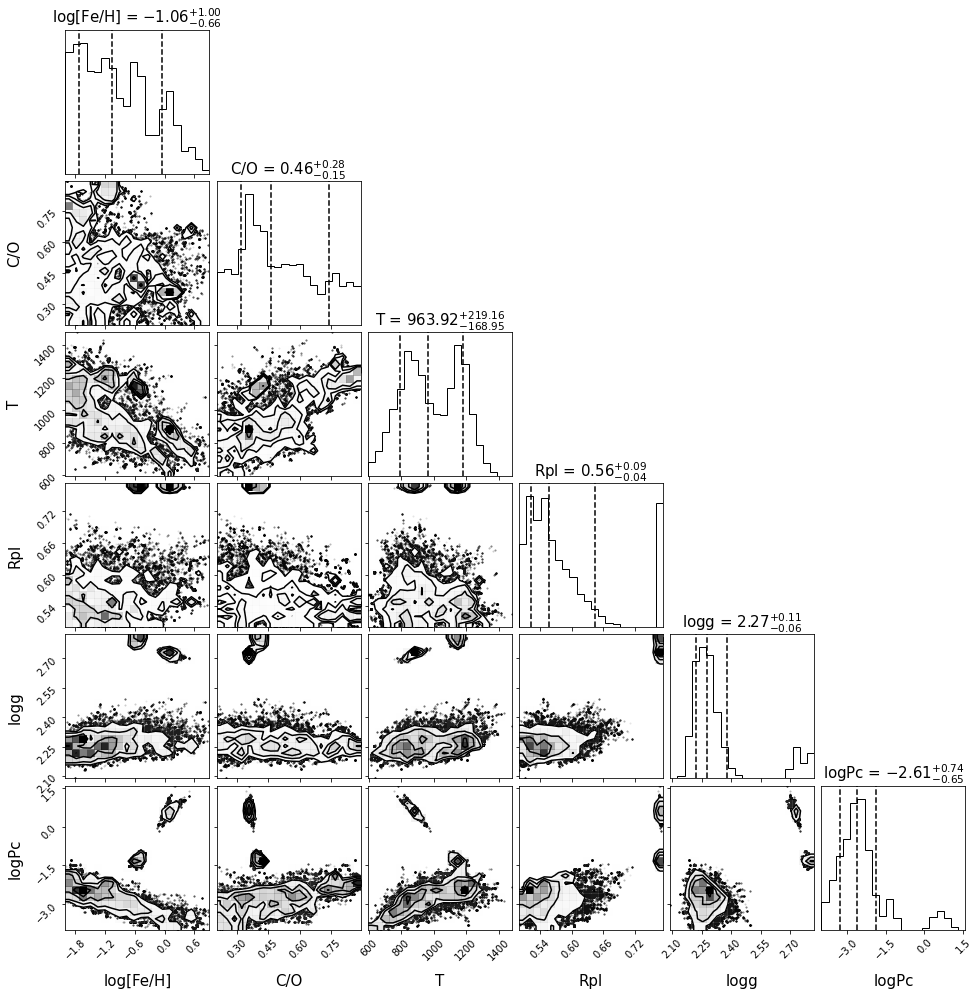

In [170]:
import corner
samples = sampler.flatchain
samples[:,3]=samples[:,3]/nc.r_jup_mean
lab=['log[Fe/H]','C/O','T','Rpl','logg','logPc']
figure=corner.corner(samples,labels=lab,quantiles=[0.16,0.5,0.84],show_titles=True,title_kwargs={"fontsize": 15},label_kwargs={"fontsize": 15})

print (samples)

In [101]:
from platon.abundance_getter import AbundanceGetter
getter = AbundanceGetter()
abundances = getter.get(1.0, 0.53)
print (abundances["H2O"])

[[           nan            nan            nan            nan
             nan            nan            nan            nan
             nan            nan            nan            nan
             nan]
 [6.16257135e-03 6.16631991e-03 6.16901363e-03 6.16916867e-03
  6.16923024e-03 6.16925993e-03 1.62718179e-03 1.62717045e-04
  1.62717539e-05 1.62717082e-06 1.62717074e-07 1.62717185e-08
  1.62717101e-09]
 [6.58676964e-03 6.58678443e-03 6.58679221e-03 6.58686662e-03
  6.58756544e-03 6.59170792e-03 6.51457505e-03 6.18450600e-03
  6.18450771e-03 6.18452112e-03 3.53668523e-03 3.53665956e-04
  3.53665687e-05]
 [3.07573021e-03 5.49299306e-03 6.55609145e-03 6.58647324e-03
  6.58678783e-03 6.58685436e-03 6.58746780e-03 6.59133535e-03
  6.59434681e-03 6.51463716e-03 6.18450689e-03 6.18450689e-03
  2.45213782e-03]
 [1.29753652e-03 1.29935565e-03 1.53813560e-03 4.01133625e-03
  6.45329948e-03 6.58537723e-03 6.58680708e-03 6.58715068e-03
  6.58973471e-03 6.59414084e-03 6.59442949e-03 6.51463886e-0